# Imports & setup

In [2]:
import nltk
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import re
import tempun

In [3]:
# global parameters for plots
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"

In [4]:
plt.rcParams['font.size'] = 8
def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

# Load data

In [5]:
coins = pd.read_parquet("../data/coins_deities_df.parquet")

In [6]:
coins.head(5)

@id  \
1      http://numismatics.org/ocre/id/ric.4.ph_i.28A   
4       http://numismatics.org/ocre/id/ric.4.crl.191   
5          http://numismatics.org/ocre/id/ric.7.ar.2   
6  http://numismatics.org/ocre/id/ric.2_1(2).tit.288   
7      http://numismatics.org/ocre/id/ric.5.cara.745   

                                               @type ontology#hasAuthority  \
1  [http://www.w3.org/2004/02/skos/core#Concept, ...       philip_the_arab   
4  [http://www.w3.org/2004/02/skos/core#Concept, ...             caracalla   
5  [http://nomisma.org/ontology#TypeSeriesItem, h...         constantine_i   
6  [http://nomisma.org/ontology#TypeSeriesItem, h...                 titus   
7  [http://nomisma.org/ontology#TypeSeriesItem, h...             carausius   

  ontology#hasDenomination ontology#hasEndDate ontology#hasManufacture  \
1                   aureus          0247-01-01                  struck   
4                 denarius          0211-01-01                  struck   
5                  solidus          0313-01-01                  struck   
6               sestertius          0081-01-01                  struck   
7             antoninianus          0293-01-01                  struck   

  ontology#hasMaterial ontology#hasMint                 @id_obverse  \
1                   av             rome      ric.4.ph_i.28A#obverse   
4                   ar             rome       ric.4.crl.191#obverse   
5                   av          arelate          ric.7.ar.2#obverse   
6                   ae             rome  ric.2_1(2).tit.288#obverse   
7                   ar  uncertain_value      ric.5.cara.745#obverse   

  ontology#hasRegion                 @id_reverse ontology#hasStartDate  \
1              italy      ric.4.ph_i.28A#reverse            0244-01-01   
4              italy       ric.4.crl.191#reverse            0211-01-01   
5             gallia          ric.7.ar.2#reverse            0313-01-01   
6              italy  ric.2_1(2).tit.288#reverse            0080-01-01   
7          britannia      ric.5.cara.745#reverse            0286-01-01   

  ontology#representsObjectType source void#inDataset  \
1                          coin    ric                  
4                          coin    ric                  
5                          coin    ric                  
6                          coin    ric                  
7                          coin    ric                  

                             core#definition  \
1                        RIC IV Philip I 28A   
4                       RIC IV Caracalla 191   
5                          RIC VII Arelate 2   
6  RIC II, Part 1 (second edition) Titus 288   
7                        RIC V Carausius 745   

                              core#prefLabel   core#broader replaces  \
1                        RIC IV Philip I 28A  ric.4.ph_i.28            
4                       RIC IV Caracalla 191                           
5                          RIC VII Arelate 2                           
6  RIC II, Part 1 (second edition) Titus 288                           
7                        RIC V Carausius 745                           

  isReplacedBy core#exactMatch ontology#hasIssuer  \
1                                                   
4                                                   
5                                                   
6                                                   
7                                                   

                ontology#hasLegend_obverse ontology#hasPortrait_obverse  \
1                  IMP M IVL PHILIPPVS AVG              philip_the_arab   
4                  ANTONINVS PIVS AVG BRIT                    caracalla   
5                        LICINI-VS P F AVG                     licinius   
6  CAES DIVI AVG VESP F DOMITIANVS COS VII                     domitian   
7                             IMP CARAVSIV                    carausius   

                                 description_obverse  \
1  Bust of Philip the Arab, laureat

In [7]:
# Wars and assasinations

wars = pd.read_csv("../data/wars-and-battles.csv")
wars["Duration"] = wars["Duration"] + 1
assassinated = pd.read_csv("../data/assassinated-emperors.csv")


In [8]:
coins["random_dates"] = coins.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=10), axis=1)

In [9]:
def get_first_random(random_dates):
    try:
        return random_dates[0]
    except:
        return None
coins["date_random"] = coins["random_dates"].apply(get_first_random)

In [10]:
coins.head(10)

@id  \
1       http://numismatics.org/ocre/id/ric.4.ph_i.28A   
4        http://numismatics.org/ocre/id/ric.4.crl.191   
5           http://numismatics.org/ocre/id/ric.7.ar.2   
6   http://numismatics.org/ocre/id/ric.2_1(2).tit.288   
7       http://numismatics.org/ocre/id/ric.5.cara.745   
8       http://numismatics.org/ocre/id/ric.6.anch.128   
9         http://numismatics.org/ocre/id/ric.5.aur.45   
13        http://numismatics.org/ocre/id/ric.5.pro.29   
15  http://numismatics.org/ocre/id/ric.2_3(2).hdn....   
17    http://numismatics.org/ocre/id/ric.3.m_aur.1397   

                                                @type ontology#hasAuthority  \
1   [http://www.w3.org/2004/02/skos/core#Concept, ...       philip_the_arab   
4   [http://www.w3.org/2004/02/skos/core#Concept, ...             caracalla   
5   [http://nomisma.org/ontology#TypeSeriesItem, h...         constantine_i   
6   [http://nomisma.org/ontology#TypeSeriesItem, h...                 titus   
7   [http://nomisma.org/ontology#TypeSeriesItem, h...             carausius   
8   [http://nomisma.org/ontology#TypeSeriesItem, h...        maximinus_daia   
9   [http://nomisma.org/ontology#TypeSeriesItem, h...              aurelian   
13  [http://www.w3.org/2004/02/skos/core#Concept, ...                probus   
15  [http://www.w3.org/2004/02/skos/core#Concept, ...               hadrian   
17  [http://nomisma.org/ontology#TypeSeriesItem, h...       marcus_aurelius   

   ontology#hasDenomination ontology#hasEndDate ontology#hasManufacture  \
1                    aureus          0247-01-01                  struck   
4                  denarius          0211-01-01                  struck   
5                   solidus          0313-01-01                  struck   
6                sestertius          0081-01-01                  struck   
7              antoninianus          0293-01-01                  struck   
8                    aureus          0311-01-01                  struck   
9              antoninianus          0275-01-01                  struck   
13             antoninianus          0282-01-01                  struck   
15                dupondius          0137-01-01                  struck   
17               sestertius          0164-01-01                  struck   

   ontology#hasMaterial  ontology#hasMint                  @id_obverse  \
1                    av              rome       ric.4.ph_i.28A#obverse   
4                    ar              rome        ric.4.crl.191#obverse   
5                    av           arelate           ric.7.ar.2#obverse   
6                    ae              rome   ric.2_1(2).tit.288#obverse   
7                    ar   uncertain_value       ric.5.cara.745#obverse   
8                    av  antiocheia_syria       ric.6.anch.128#obverse   
9                    ar              rome         ric.5.aur.45#obverse   
13                   ar          lugdunum         ric.5.pro.29#obverse   
15                   ae              rome  ric.2_3(2).hdn.2680#obverse   
17                   ae              rome     ric.3.m_aur.1397#obverse   

   ontology#hasRegion                  @id_reverse ontology#hasStartDate  \
1               italy       ric.4.ph_i.28A#reverse            0244-01-01   
4               italy        ric.4.crl.191#reverse            0211-01-01   
5              gallia           ric.7.ar.2#reverse            0313-01-01   
6               italy   ric.2_1(2).tit.288#reverse            0080-01-01   
7           britannia       ric.5.cara.745#reverse            0286-01-01   
8               syria       ric.6.anch.128#reverse            0310-01-01   
9               italy         ric.5.aur.45#reverse            0270-01-01   
13             gallia         ric.5.pro.29#reverse            0276-01-01   
15              italy  ric.2_3(2).hdn.2680#reverse            0137-01-01   
17              italy     ric.3.m_aur.1397#reverse            0163-01-01   

   ontology#representsObjectType source void#inDataset  \
1               

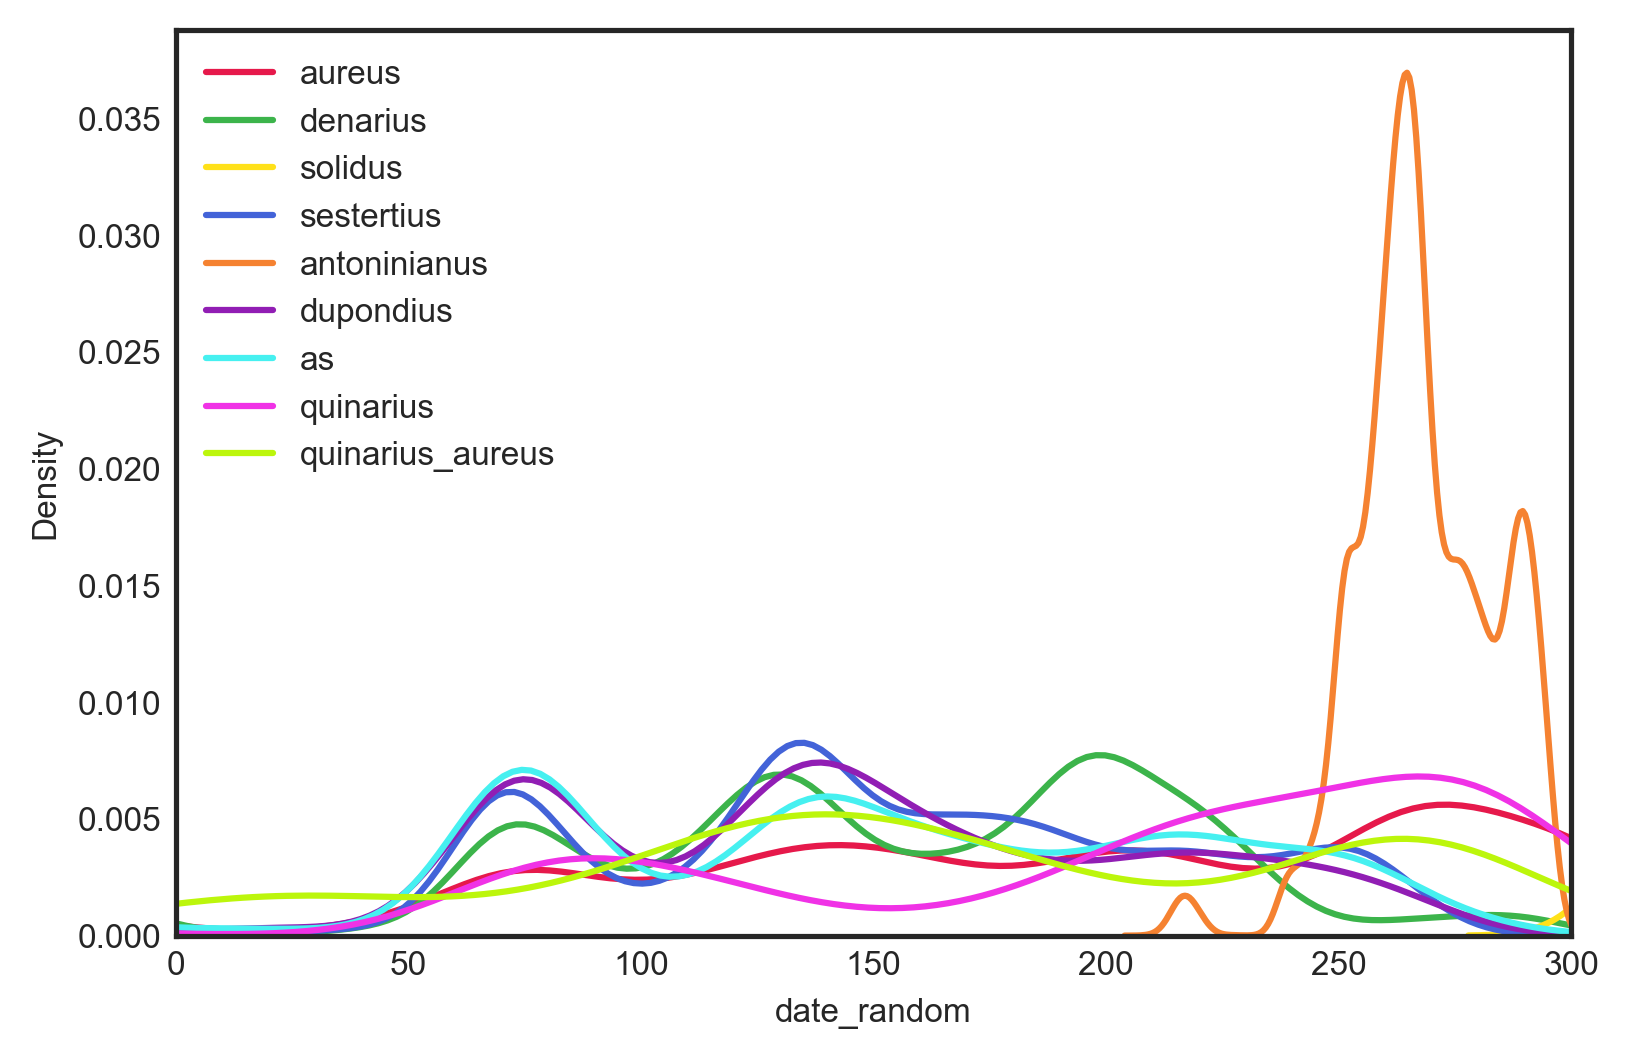

In [11]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()

for type, color in zip(coins["ontology#hasDenomination"].unique(), colors):
    sns.kdeplot(coins[coins["ontology#hasDenomination"]==type]["date_random"], color=color, label=type, ax=ax)
ax.set_xlim(0,300)
ax.legend()

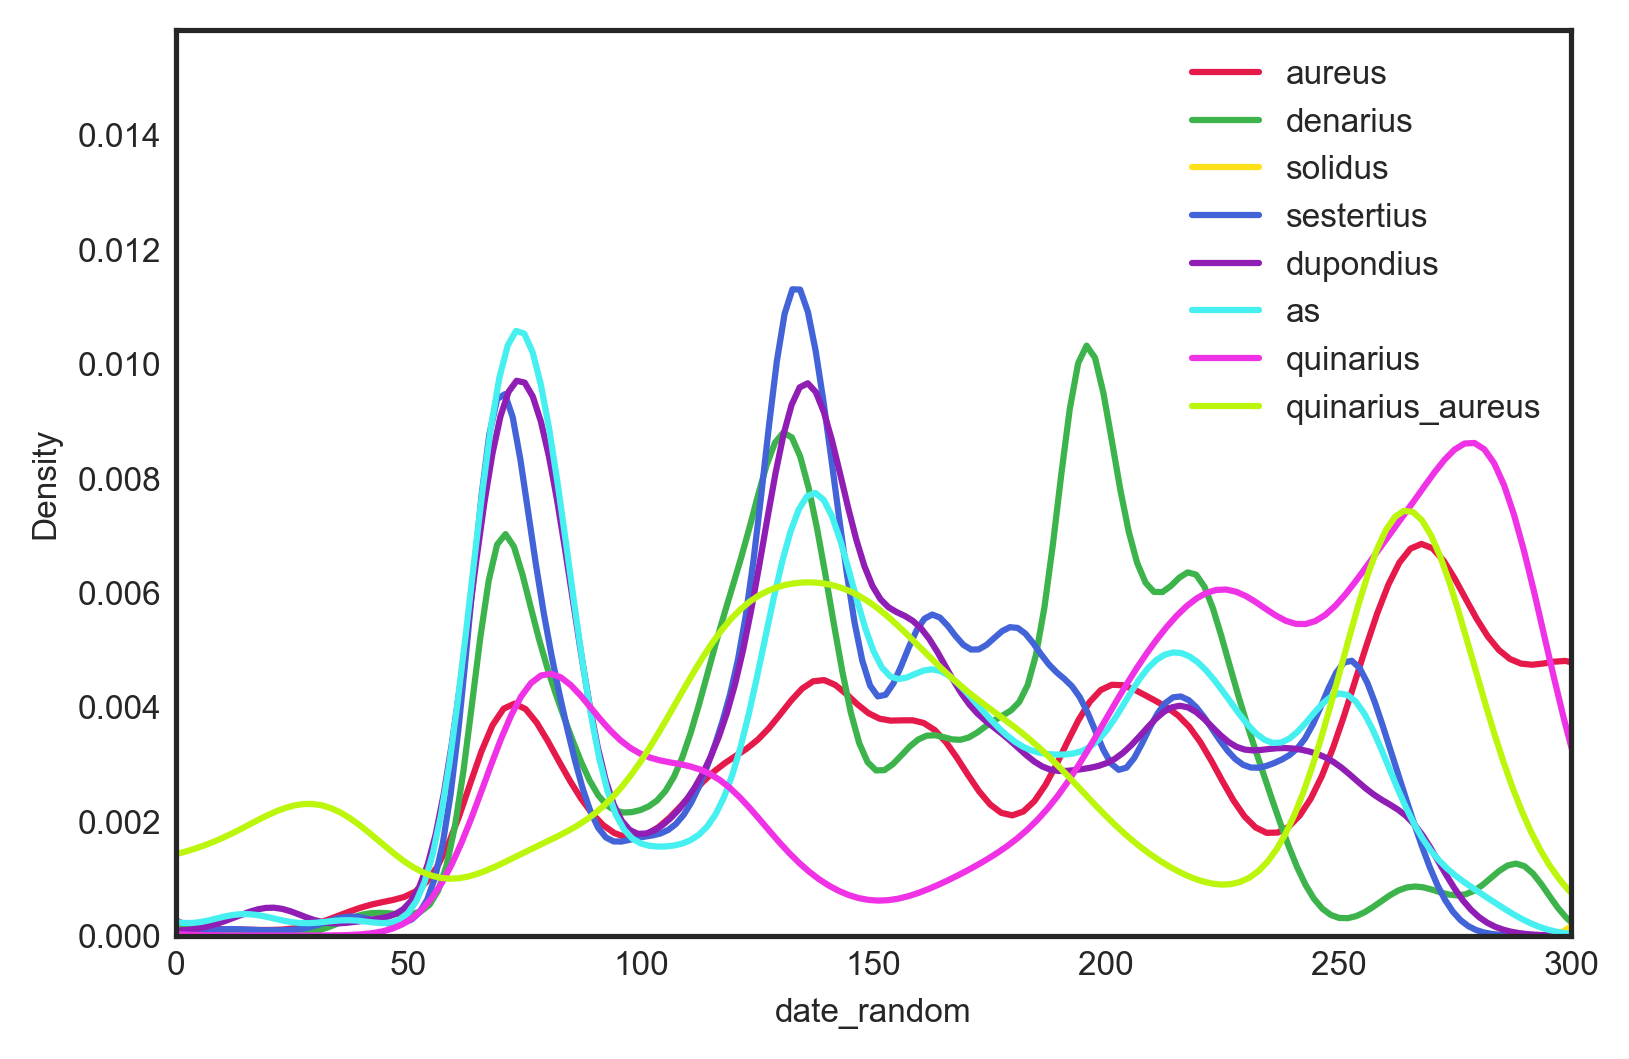

In [12]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()

for type, color in zip(coins["ontology#hasDenomination"].unique(), colors):
    if type != "antoninianus":
        sns.kdeplot(coins[coins["ontology#hasDenomination"]==type]["date_random"], color=color, label=type, ax=ax, bw_adjust=0.5)
ax.set_xlim(0,300)
ax.legend()

In [13]:
all_deities_list_flat = [d for dl in coins["deities"] for d in dl]
deities_top20_counts = nltk.FreqDist(all_deities_list_flat).most_common(20)
deities_top20_counts

[('Victory', 5375),
 ('Pax', 1326),
 ('Mars', 1317),
 ('Roma', 1286),
 ('Fortuna', 1110),
 ('Felicitas', 972),
 ('Providentia', 928),
 ('Concordia', 895),
 ('Salus', 839),
 ('Minerva', 832),
 ('Sol', 790),
 ('Liberalitas', 675),
 ('Aequitas', 613),
 ('Spes', 612),
 ('Hercules', 560),
 ('Pietas', 554),
 ('Fides', 534),
 ('Genius', 484),
 ('Securitas', 480),
 ('Venus', 457)]

In [14]:
all_deities_list_flat = [d for dl in coins["deities"] for d in dl]
deities_top20_counts = nltk.FreqDist(all_deities_list_flat).most_common(20)
deities_top20_counts

[('Victory', 5375),
 ('Pax', 1326),
 ('Mars', 1317),
 ('Roma', 1286),
 ('Fortuna', 1110),
 ('Felicitas', 972),
 ('Providentia', 928),
 ('Concordia', 895),
 ('Salus', 839),
 ('Minerva', 832),
 ('Sol', 790),
 ('Liberalitas', 675),
 ('Aequitas', 613),
 ('Spes', 612),
 ('Hercules', 560),
 ('Pietas', 554),
 ('Fides', 534),
 ('Genius', 484),
 ('Securitas', 480),
 ('Venus', 457)]

In [15]:
deities_top20 = [tup[0] for tup in deities_top20_counts]

In [84]:
start, stop = -50, 350
diff = 10
data = []
for date in range(start, stop):
    subset = coins[coins["date_random"].between(date-diff, date+diff)]
    if len(subset) > 0:
        deities_list_flat = [d for l in subset["deities"] for d in l]
        deities_count = len(deities_list_flat)
        deities_list_flat_top20 = [d for d in deities_list_flat if d in deities_top20]
        deities_counts = nltk.FreqDist(deities_list_flat_top20).most_common()
        #most_common_total = np.sum([tup[1] for tup in deities_counts])
        deities_counts.append(("rest",  deities_count - len(deities_list_flat_top20)))
        deities_freqs_pct = [(tup[0], np.round(tup[1] / deities_count * 100, 2)) for tup in deities_counts]
        year_data = {"date": date,
                     "n" : deities_count,
                     "counts" : deities_counts,
                     "freqs_pct" : deities_freqs_pct}
    else:
        year_data = {"date" : date,
                 "n" : 0,
                 "counts" : [],
                 "freqs_pct" : []}
    print(year_data)
    data.append(year_data)

{'date': -50, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -49, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -48, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -47, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -46, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -45, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -44, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -43, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -42, 'n': 2, 'counts': [('Victory', 1), ('Venus', 1), ('rest', 0)], 'freqs_pct': [('Victory', 50.0), ('Venus', 50.0), ('rest', 0.0)]}
{'date': -41, 'n': 3, 'counts': [('Victory', 2), ('Venus', 1), ('rest', 0)], 'freqs_pct': [('Victory', 66.67), ('Venus', 33.33), ('rest', 0.0)]}
{'date': -40, 'n': 10, 'counts': [('Victory', 7), ('Venus', 2), ('Pax', 1), ('rest', 0)], 'freqs_pct': [('Victory', 70.0), ('Venus', 20.0), ('Pax', 10.0), ('rest', 0.0)]}
{'date': -39, 'n': 14, 'counts': [('Victory', 11), ('Venus', 2), ('Pax', 1), ('rest', 0)], 'freqs_pct': [('Victory', 

In [88]:
date_freqs_df = pd.DataFrame([dict([("date", el["date"])]  + el["freqs_pct"]) for el in data])
date_freqs_df.set_index("date", inplace=True)

In [89]:
date_freqs_df = date_freqs_df[[col for col in date_freqs_df.columns if col !="rest"] + ["rest"]]

In [90]:
date_freqs_df.fillna(0, inplace=True) #,inplace=True)

In [91]:
date_freqs_df

Victory  Venus  Pax  Mars  Concordia  Securitas  Fortuna  Spes  Minerva  \
date                                                                            
-50      0.00    0.0  0.0  0.00        0.0       0.00      0.0   0.0      0.0   
-49      0.00    0.0  0.0  0.00        0.0       0.00      0.0   0.0      0.0   
-48      0.00    0.0  0.0  0.00        0.0       0.00      0.0   0.0      0.0   
-47      0.00    0.0  0.0  0.00        0.0       0.00      0.0   0.0      0.0   
-46      0.00    0.0  0.0  0.00        0.0       0.00      0.0   0.0      0.0   
...       ...    ...  ...   ...        ...        ...      ...   ...      ...   
 345    35.10    0.0  0.0  1.18        0.0       0.88      0.0   0.0      0.0   
 346    30.59    0.0  0.0  0.85        0.0       0.85      0.0   0.0      0.0   
 347    26.85    0.0  0.0  0.82        0.0       0.82      0.0   0.0      0.0   
 348    24.45    0.0  0.0  0.82        0.0       0.82      0.0   0.0      0.0   
 349    22.46    0.0  0.0  0.53        0.0       0.80      0.0   0.0      0.0   

       Roma  Genius  Liberalitas  Salus  Aequitas  Felicitas  Fides  Pietas  \
date                                                                          
-50    0.00     0.0          0.0    0.0       0.0        0.0    0.0     0.0   
-49    0.00     0.0          0.0    0.0       0.0        0.0    0.0     0.0   
-48    0.00     0.0          0.0    0.0       0.0        0.0    0.0     0.0   
-47    0.00     0.0          0.0    0.0       0.0        0.0    0.0     0.0   
-46    0.00     0.0          0.0    0.0       0.0        0.0    0.0     0.0   
...     ...     ...          ...    ...       ...        ...    ...     ...   
 345  23.89     0.0          0.0    0.0       0.0        0.0    0.0     0.0   
 346  26.63     0.0          0.0    0.0       0.0        0.0    0.0     0.0   
 347  28.77     0.0          0.0    0.0       0.0        0.0    0.0     0.0   
 348  29.95     0.0          0.0    0.0       0.0        0.0    0.0     0.0   
 349  31.28     0.0          0.0    0.0       0.0        0.0    0.0     0.0   

      Hercules  Providentia  Sol   rest  
date                                     
-50        0.0          0.0  0.0   0.00  
-49        0.0          0.0  0.0   0.00  
-48        0.0          0.0  0.0   0.00  
-47        0.0          0.0  0.0   0.00  
-46        0.0          0.0  0.0   0.00  
...        ...          ...  ...    ...  
 345       0.0          0.0  0.0  38.94  
 346       0.0          0.0  0.0  41.08  
 347       0.0          0.0  0.0  42.74  
 348       0.0          0.0  0.0  43.96  
 349       0.0          0.0  0.0  44.92  

[400 rows x 21 columns]

In [92]:
date_freqs_dict = date_freqs_df.to_dict("list")# ["column_dtypes]

In [93]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

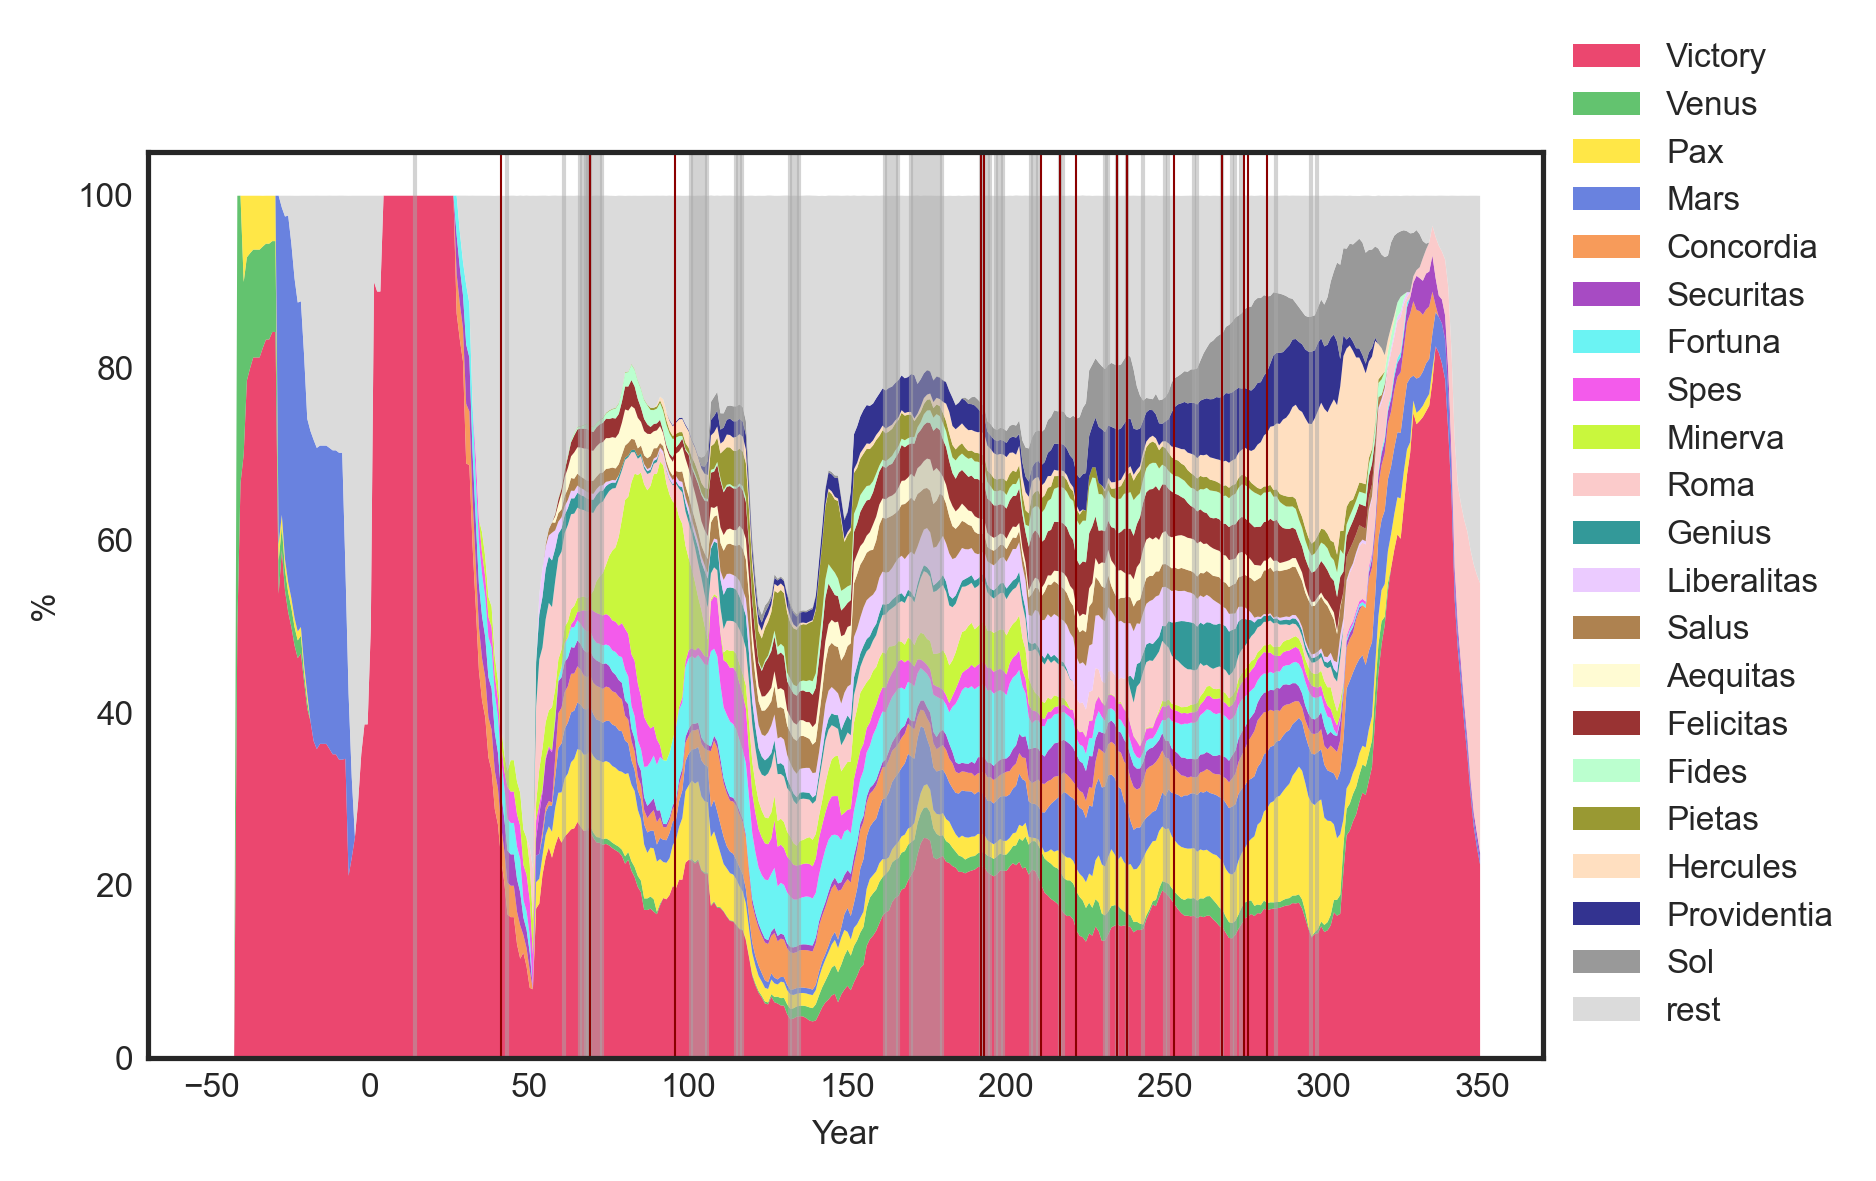

In [94]:
fig, ax = plt.subplots()
ax.stackplot(date_freqs_df.index, date_freqs_dict.values(),
             labels=date_freqs_dict.keys(), linewidth=0, colors=colors, alpha=0.8)
ax.legend(loc='lower left', bbox_to_anchor=(1,0))
ax.set_xlabel('Year')
ax.set_ylabel('%')

for n in wars.index:
    war = dict(wars.iloc[n])
    ax.axvspan(war["Start_date"], war["End_date"], color="darkgrey", alpha=0.5)

for n in assassinated.index:
    assass = dict(assassinated.iloc[n])
    ax.axvline(assass["Assassinated"], color="darkred", lw=0.5)

In [95]:
start, stop = -50, 350
diff = 10
data = []
for date in range(start, stop):
    subset = coins[coins["date_random"].between(date-diff, date+diff)]
    if len(subset) > 0:
        deities_list_flat = [d for l in subset["deities"] for d in l]
        deities_count = len(deities_list_flat)
        deities_list_flat_bens = [d for d in deities_list_flat if d in ["Pax", "Securitas", "Felicitas", "Salus"]]
        deities_counts = nltk.FreqDist(deities_list_flat_bens).most_common()
        #most_common_total = np.sum([tup[1] for tup in deities_counts])
        deities_counts.append(("rest",  deities_count - len(deities_list_flat_bens)))
        deities_freqs_pct = [(tup[0], np.round(tup[1] / deities_count * 100, 2)) for tup in deities_counts]
        year_data = {"date": date,
                     "n" : deities_count,
                     "counts" : deities_counts,
                     "freqs_pct" : deities_freqs_pct}
    else:
        year_data = {"date" : date,
                     "n" : 0,
                     "counts" : [],
                     "freqs_pct" : []}
    print(year_data)
    data.append(year_data)

{'date': -50, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -49, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -48, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -47, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -46, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -45, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -44, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -43, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -42, 'n': 2, 'counts': [('rest', 2)], 'freqs_pct': [('rest', 100.0)]}
{'date': -41, 'n': 3, 'counts': [('rest', 3)], 'freqs_pct': [('rest', 100.0)]}
{'date': -40, 'n': 10, 'counts': [('Pax', 1), ('rest', 9)], 'freqs_pct': [('Pax', 10.0), ('rest', 90.0)]}
{'date': -39, 'n': 14, 'counts': [('Pax', 1), ('rest', 13)], 'freqs_pct': [('Pax', 7.14), ('rest', 92.86)]}
{'date': -38, 'n': 15, 'counts': [('Pax', 1), ('rest', 14)], 'freqs_pct': [('Pax', 6.67), ('rest', 93.33)]}
{'date': -37, 'n': 16, 'counts': [('Pax', 1), ('rest', 15)], 'freqs_pct': [('Pax', 6.25), ('rest

In [96]:
date_freqs_df_4bens = pd.DataFrame([dict([("date", el["date"])]  + el["freqs_pct"]) for el in data])
date_freqs_df_4bens.set_index("date", inplace=True)
date_freqs_df_4bens = date_freqs_df_4bens[["Securitas", "Pax", "Salus", "Felicitas", "rest"]]
date_freqs_df_4bens

Securitas  Pax  Salus  Felicitas   rest
date                                         
-50         NaN  NaN    NaN        NaN    NaN
-49         NaN  NaN    NaN        NaN    NaN
-48         NaN  NaN    NaN        NaN    NaN
-47         NaN  NaN    NaN        NaN    NaN
-46         NaN  NaN    NaN        NaN    NaN
...         ...  ...    ...        ...    ...
 345       0.88  NaN    NaN        NaN  99.12
 346       0.85  NaN    NaN        NaN  99.15
 347       0.82  NaN    NaN        NaN  99.18
 348       0.82  NaN    NaN        NaN  99.18
 349       0.80  NaN    NaN        NaN  99.20

[400 rows x 5 columns]

In [97]:
date_freqs_df_4bens.fillna(0, inplace=True)  #,inplace=True)
date_freqs_dict_4bens = date_freqs_df_4bens.to_dict("list")  # ["column_dtypes]

In [98]:
date_freqs_df_4bens

Securitas  Pax  Salus  Felicitas   rest
date                                         
-50        0.00  0.0    0.0        0.0   0.00
-49        0.00  0.0    0.0        0.0   0.00
-48        0.00  0.0    0.0        0.0   0.00
-47        0.00  0.0    0.0        0.0   0.00
-46        0.00  0.0    0.0        0.0   0.00
...         ...  ...    ...        ...    ...
 345       0.88  0.0    0.0        0.0  99.12
 346       0.85  0.0    0.0        0.0  99.15
 347       0.82  0.0    0.0        0.0  99.18
 348       0.82  0.0    0.0        0.0  99.18
 349       0.80  0.0    0.0        0.0  99.20

[400 rows x 5 columns]

In [99]:
colors = colors[:4] + ["lightgray"]
colors

['#e6194b', '#3cb44b', '#ffe119', '#4363d8', 'lightgray']

(0.0, 27.0)

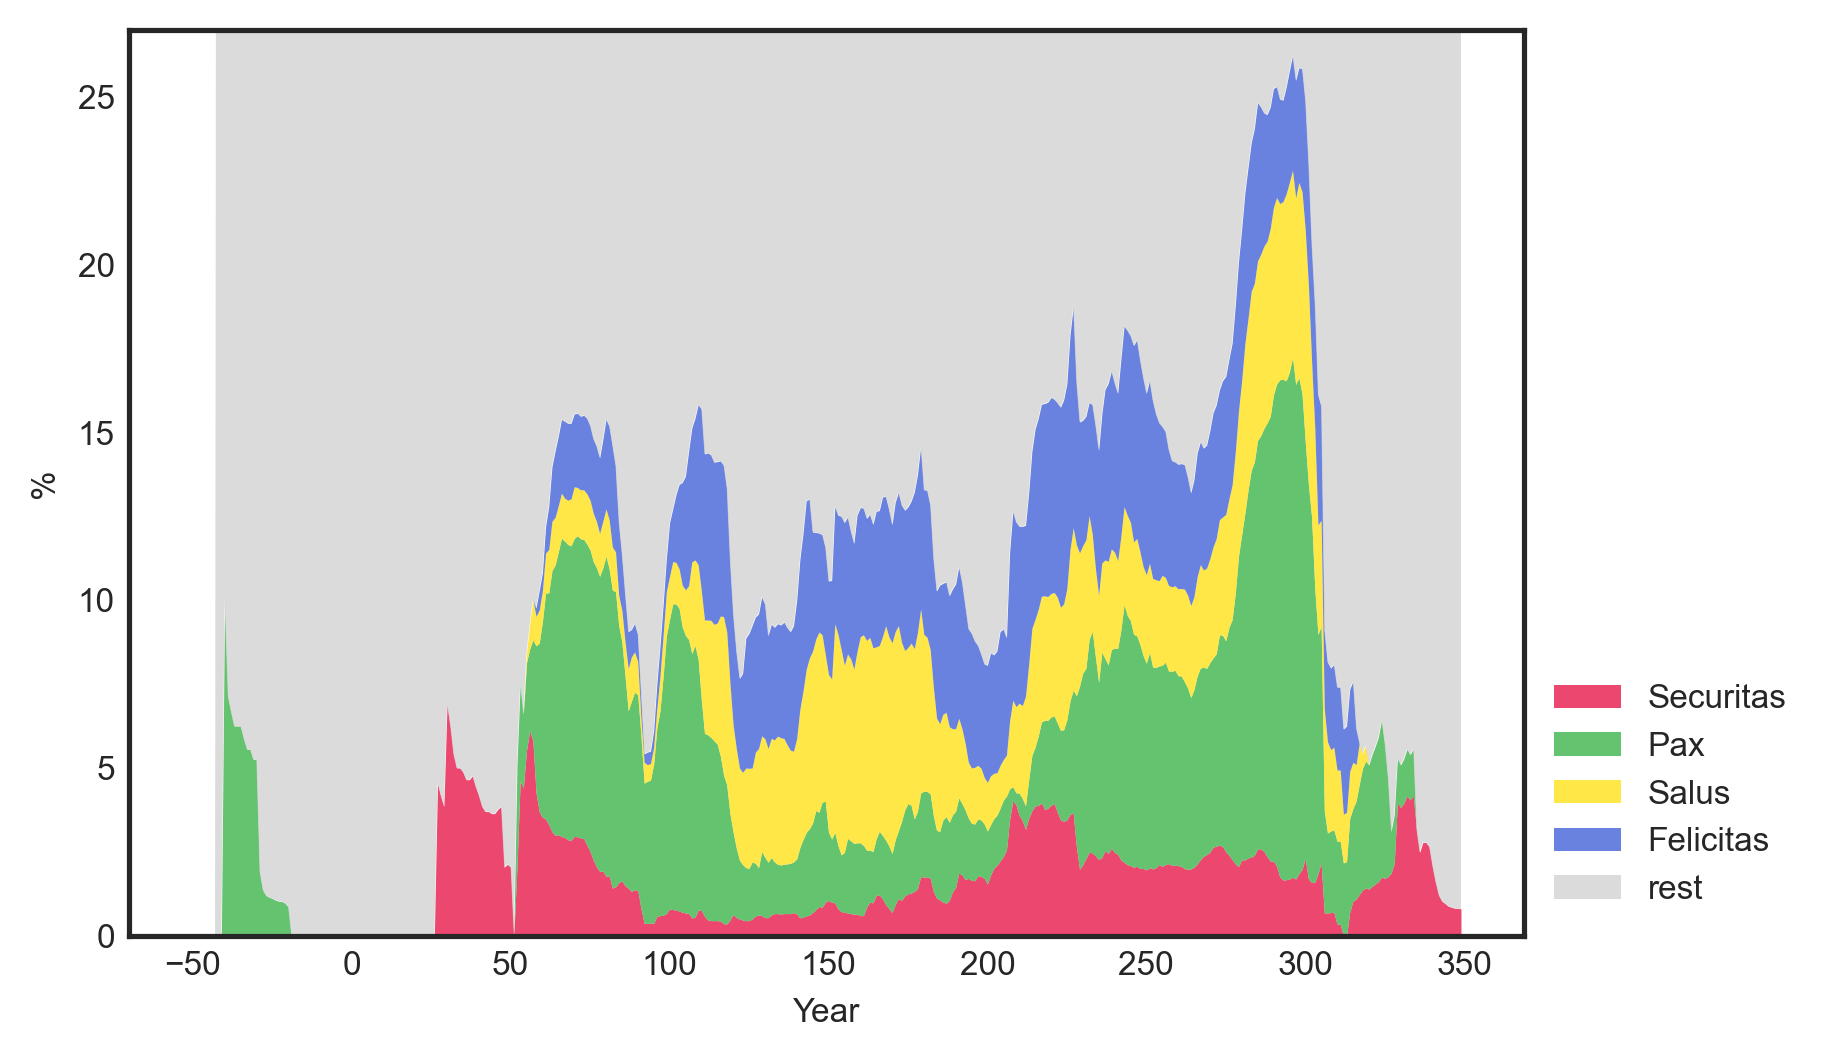

In [100]:
fig, ax = plt.subplots()
ax.stackplot(date_freqs_df_4bens.index, date_freqs_dict_4bens.values(),
             labels=date_freqs_dict_4bens.keys(), linewidth=0, colors=colors, alpha=0.8)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_xlabel('Year')
ax.set_ylabel('%')
ax.set_ylim(0,27)

# coins to dates

In [71]:
start, stop = -50, 350
data = []
for date in range(start, stop):
    date_subset = coins[coins["date_random"]==date]
    date_dict = {}
    date_dict["date"] = date
    #date_dict["coins_n"] = len(date_subset)
    deities_list_flat = [d for l in date_subset["deities"] for d in l]
    #date_dict["deities_n"] = len(deities_list_flat)
    deities_unique = list(set(deities_list_flat))
    #date_dict["deities_unique_N"] = len(deities_unique)
    deities_counts_dict = dict(nltk.FreqDist(deities_list_flat).most_common())
    date_dict.update(deities_counts_dict)
    data.append(date_dict)

In [72]:
deities_by_date_df = pd.DataFrame(data)
deities_by_date_df.fillna(0, inplace=True)  #,inplace=True)
deities_by_date_df.set_index("date", inplace=True)
deities_by_date_df[165:200]

Victory  Venus   Pax  Mars  Aurora  Pegasus  Apollo  Diana  Sicilia  \
date                                                                        
115       3.0    0.0   0.0   1.0     0.0      0.0     0.0    0.0      0.0   
116       5.0    0.0   0.0   0.0     0.0      0.0     0.0    1.0      0.0   
117      12.0    0.0  15.0   2.0     0.0      1.0     0.0    0.0      0.0   
118       0.0    0.0   0.0   0.0     0.0      0.0     0.0    0.0      0.0   
119       5.0    0.0   5.0   0.0     0.0      0.0     0.0    0.0      0.0   
120      35.0    0.0   4.0   4.0     0.0      0.0     0.0    0.0      0.0   
121      31.0    0.0   3.0   3.0     0.0      0.0     0.0    0.0      0.0   
122      17.0    0.0   8.0   0.0     0.0      0.0     0.0    0.0      0.0   
123       8.0    0.0   3.0   0.0     0.0      0.0     0.0    0.0      0.0   
124       3.0    0.0   0.0   0.0     0.0      1.0     0.0    4.0      0.0   
125       2.0    0.0   0.0   1.0     0.0      1.0     0.0    3.0      0.0   
126      12.0    0.0   0.0   0.0     0.0      0.0     0.0    0.0      0.0   
127       9.0    0.0   0.0   0.0     0.0      0.0     0.0    0.0      0.0   
128       6.0    1.0   0.0   2.0     0.0      0.0     0.0    0.0      0.0   
129       9.0    0.0   1.0   2.0     0.0     12.0     0.0    0.0      0.0   
130       6.0    2.0   0.0   1.0     0.0     15.0     0.0    0.0      1.0   
131       1.0    1.0   0.0   1.0     0.0      0.0     0.0    0.0      4.0   
132       0.0    1.0   0.0   4.0     0.0      0.0     0.0    0.0      4.0   
133       1.0    0.0   1.0   0.0     0.0      0.0     0.0    0.0      0.0   
134       1.0    1.0   2.0   0.0     0.0      0.0     0.0    0.0      0.0   
135       2.0    0.0   0.0   0.0     0.0      0.0     0.0    0.0      0.0   
136      37.0    2.0   6.0   0.0     0.0      0.0     0.0    0.0      0.0   
137       1.0   11.0   0.0   0.0     0.0      0.0     0.0    3.0      0.0   
138       7.0    5.0  10.0   0.0     0.0      0.0     0.0   16.0      0.0   
139       2.0    3.0  18.0   0.0     0.0      0.0     0.0    1.0      3.0   
140       3.0    2.0   1.0   1.0     0.0      0.0     1.0    0.0      0.0   
141      12.0    9.0   2.0   5.0     0.0      0.0     1.0    1.0      0.0   
142       6.0    0.0   3.0   0.0     0.0      0.0     2.0    0.0      0.0   
143      19.0    0.0   2.0   4.0     0.0      0.0     1.0    0.0      0.0   
144      15.0    0.0   1.0   0.0     0.0      0.0     1.0    0.0      0.0   
145       6.0    1.0   0.0   0.0     0.0      0.0     0.0    0.0      0.0   
146       0.0    1.0   0.0   0.0     0.0      0.0     0.0    0.0      0.0   
147       5.0    4.0   0.0   0.0     0.0      0.0     0.0    1.0      0.0   
148       1.0    5.0   1.0   2.0     0.0      0.0     0.0    1.0      0.0   
149       2.0    1.0   0.0   0.0     0.0      0.0     0.0    0.0      0.0   

      Pan  Concordia  Securitas  Fortuna  Vesta  Constantia  Nemesis  Ceres  \
date                                                                          
115   0.0        0.0        0.0      2.0    1.0         0.0      0.0    0.0   
116   0.0        0.0        0.0      3.0    0.0         0.0      0.0    0.0   
117   0.0       48.0        0.0     49.0    0.0         0.0      0.0    0.0   
118   0.0        0.0        0.0      1.0    1.0         0.0      0.0    0.0   
119   0.0        9.0        2.0      4.0    0.0         0.0      0.0    0.0   
120   0.0        8.0        2.0      1.0    0.0         0.0      0.0    0.0   
121   0.0        4.0        0.0     11.0    0.0         0.0      0.0    2.0   
122   0.0        5.0        0.0     12.0    0.0         0.0      0.0    2.0   
123   0.0        2.0        0.0      4.0    0.0         0.0      0.0    3.0   
124   0.0        2.0        0.0      0.0    0.0         0.0      0.0    0.0   
125   0.0        3.0        0.0      1.0    0.0         0.0      0.0    0.0   
126   0.0        0.0        0.0      0.0    0.0         0.0      0.0    0.0   
127   0.0        0.0        0.0      0.0    1.0   

In [73]:
pctchange_df = deities_by_date_df.pct_change()
pctchange_df.replace(np.inf, 1, inplace=True)
pctchange_df.fillna(0, inplace=True)
pctchange_df = pctchange_df * 100 #to percentage
pctchange_df[100:140]

Victory       Venus         Pax        Mars  Aurora  Pegasus  \
date                                                                    
50      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
51      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
52      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
53      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
54      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
55    100.000000    0.000000    0.000000    0.000000     0.0      0.0   
56   -100.000000    0.000000    0.000000    0.000000     0.0      0.0   
57      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
58      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
59      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
60      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
61      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
62    100.000000    0.000000  100.000000  100.000000     0.0      0.0   
63      0.000000    0.000000  -33.333333  -33.333333     0.0      0.0   
64     80.000000    0.000000  -50.000000  -50.000000     0.0      0.0   
65    -18.518519    0.000000  200.000000  200.000000     0.0      0.0   
66     -9.090909    0.000000  -66.666667  -66.666667     0.0      0.0   
67    -20.000000    0.000000  400.000000  400.000000     0.0      0.0   
68    406.250000    0.000000  300.000000  160.000000     0.0      0.0   
69     43.209877    0.000000   30.000000  169.230769     0.0      0.0   
70    -88.793103    0.000000  -42.307692  -68.571429     0.0      0.0   
71    684.615385    0.000000  140.000000  100.000000     0.0      0.0   
72    -63.725490    0.000000  -69.444444  -59.090909     0.0      0.0   
73      8.108108    0.000000  127.272727  -44.444444     0.0      0.0   
74    -47.500000    0.000000  -56.000000 -100.000000     0.0      0.0   
75     42.857143    0.000000    9.090909    0.000000     0.0      0.0   
76    -76.666667    0.000000   25.000000    0.000000     0.0    100.0   
77    100.000000    0.000000  -53.333333  100.000000     0.0   -100.0   
78     78.571429    0.000000    0.000000  -66.666667     0.0      0.0   
79    -16.000000  100.000000    0.000000    0.000000     0.0      0.0   
80     23.809524  -92.857143  157.142857   50.000000     0.0      0.0   
81     15.384615  100.000000    0.000000    0.000000     0.0      0.0   
82    -80.000000 -100.000000  -94.444444  -66.666667     0.0      0.0   
83   -100.000000    0.000000 -100.000000 -100.000000     0.0      0.0   
84    100.000000    0.000000    0.000000  100.000000     0.0      0.0   
85    300.000000    0.000000  100.000000  300.000000     0.0      0.0   
86    -59.375000    0.000000 -100.000000  -75.000000     0.0      0.0   
87    -38.461538    0.000000    0.000000  -50.000000     0.0      0.0   
88    -25.000000    0.000000    0.000000 -100.000000     0.0      0.0   
89    -33.333333    0.000000  100.000000    0.000000     0.0      0.0   

          Apollo  Diana  Sicilia  Pan   Concordia    Securitas      Fortuna  \
date                                                                          
50      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
51      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
52      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
53      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
54      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
55      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
56      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
57      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
58      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
59      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.0000

In [74]:
pctchange_df = pctchange_df.abs()
pctchange_df[100:140]

Victory       Venus         Pax        Mars  Aurora  Pegasus  \
date                                                                    
50      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
51      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
52      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
53      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
54      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
55    100.000000    0.000000    0.000000    0.000000     0.0      0.0   
56    100.000000    0.000000    0.000000    0.000000     0.0      0.0   
57      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
58      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
59      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
60      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
61      0.000000    0.000000    0.000000    0.000000     0.0      0.0   
62    100.000000    0.000000  100.000000  100.000000     0.0      0.0   
63      0.000000    0.000000   33.333333   33.333333     0.0      0.0   
64     80.000000    0.000000   50.000000   50.000000     0.0      0.0   
65     18.518519    0.000000  200.000000  200.000000     0.0      0.0   
66      9.090909    0.000000   66.666667   66.666667     0.0      0.0   
67     20.000000    0.000000  400.000000  400.000000     0.0      0.0   
68    406.250000    0.000000  300.000000  160.000000     0.0      0.0   
69     43.209877    0.000000   30.000000  169.230769     0.0      0.0   
70     88.793103    0.000000   42.307692   68.571429     0.0      0.0   
71    684.615385    0.000000  140.000000  100.000000     0.0      0.0   
72     63.725490    0.000000   69.444444   59.090909     0.0      0.0   
73      8.108108    0.000000  127.272727   44.444444     0.0      0.0   
74     47.500000    0.000000   56.000000  100.000000     0.0      0.0   
75     42.857143    0.000000    9.090909    0.000000     0.0      0.0   
76     76.666667    0.000000   25.000000    0.000000     0.0    100.0   
77    100.000000    0.000000   53.333333  100.000000     0.0    100.0   
78     78.571429    0.000000    0.000000   66.666667     0.0      0.0   
79     16.000000  100.000000    0.000000    0.000000     0.0      0.0   
80     23.809524   92.857143  157.142857   50.000000     0.0      0.0   
81     15.384615  100.000000    0.000000    0.000000     0.0      0.0   
82     80.000000  100.000000   94.444444   66.666667     0.0      0.0   
83    100.000000    0.000000  100.000000  100.000000     0.0      0.0   
84    100.000000    0.000000    0.000000  100.000000     0.0      0.0   
85    300.000000    0.000000  100.000000  300.000000     0.0      0.0   
86     59.375000    0.000000  100.000000   75.000000     0.0      0.0   
87     38.461538    0.000000    0.000000   50.000000     0.0      0.0   
88     25.000000    0.000000    0.000000  100.000000     0.0      0.0   
89     33.333333    0.000000  100.000000    0.000000     0.0      0.0   

          Apollo  Diana  Sicilia  Pan   Concordia    Securitas      Fortuna  \
date                                                                          
50      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
51      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
52      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
53      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
54      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
55      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
56      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
57      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
58      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.000000   
59      0.000000    0.0      0.0  0.0    0.000000     0.000000     0.0000

In [75]:
pctchange_df["mean_change"] = pctchange_df.mean(axis=1)
pctchange_df["mean_change"][165:200]

date
115    13.274905
116     8.661992
117    29.815951
118    13.484412
119    14.110429
120    26.043919
121    22.685145
122    14.511469
123     7.175508
124    12.407975
125     9.008180
126    18.047035
127    10.446489
128    22.315951
129    50.094946
130    35.062008
131    43.162598
132    19.281956
133    31.370126
134    40.419887
135    12.411521
136    31.773582
137    46.853655
138    22.842178
139    25.467052
140    26.090212
141    90.214724
142    21.465276
143    23.287321
144    17.429771
145    22.453988
146     6.850415
147    16.871166
148    11.389132
149    14.239945
Name: mean_change, dtype: float64

Text(0, 0.5, 'avg. pct. change')

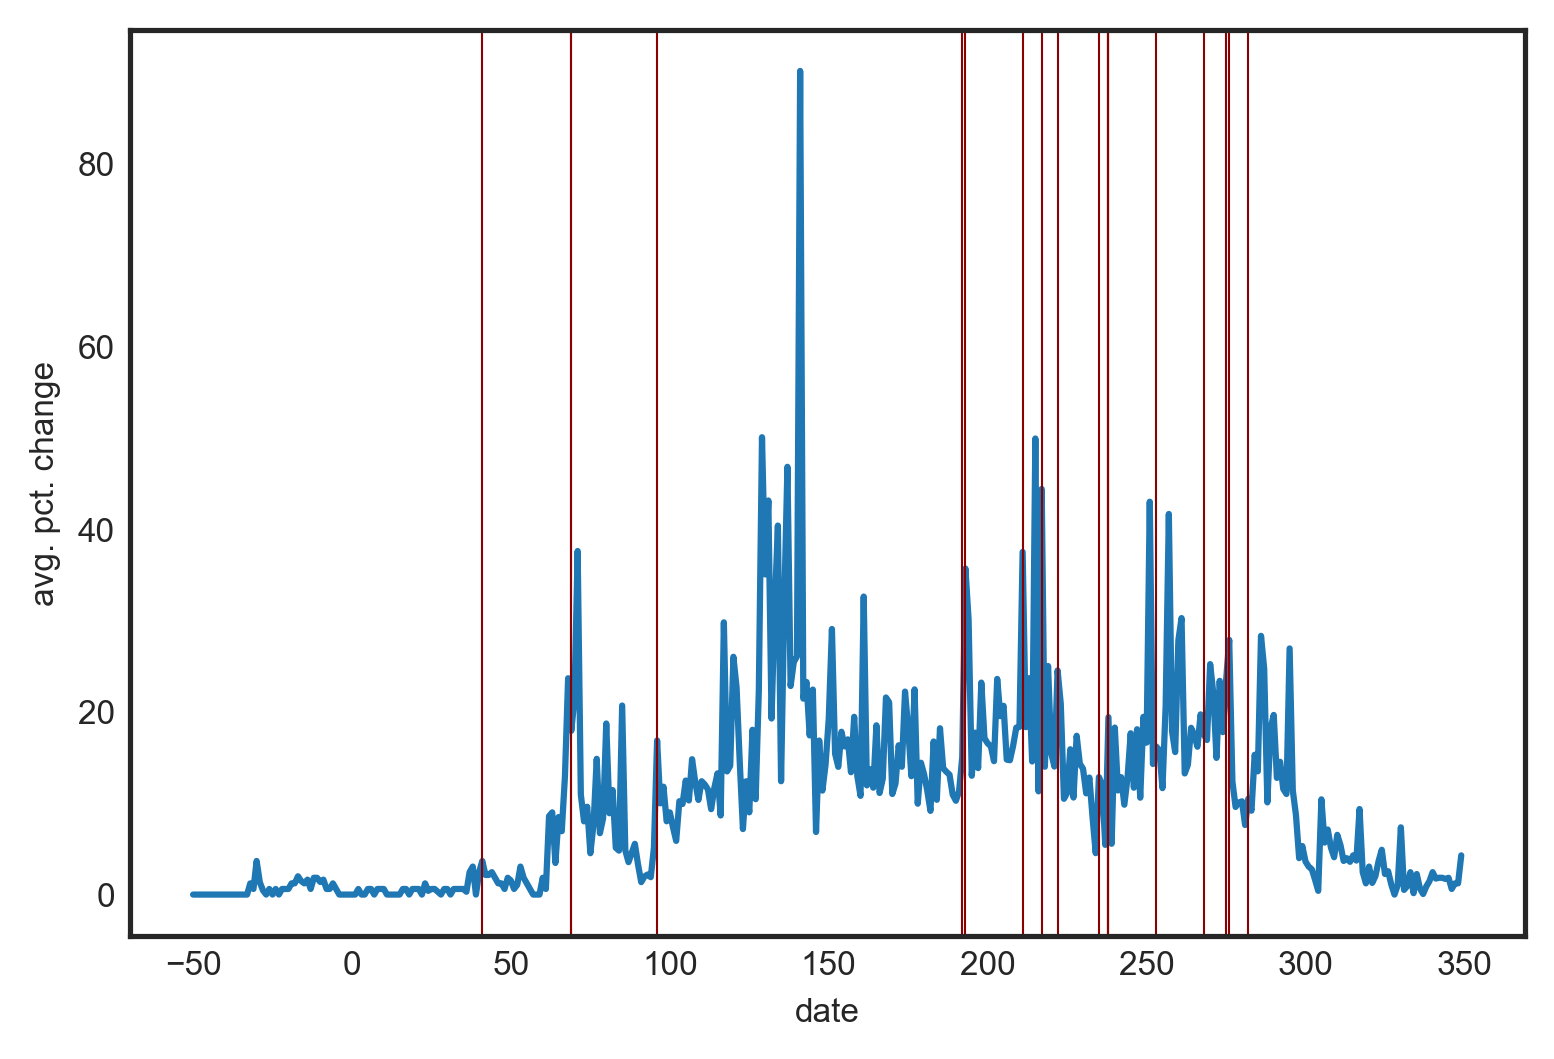

In [76]:
fig, ax = plt.subplots()

pctchange_df["mean_change"].plot(ax=ax)
for n in assassinated.index:
    assass = dict(assassinated.iloc[n])
    ax.axvline(assass["Assassinated"], color="darkred", lw=0.5)
ax.set_ylabel("avg. pct. change")

In [77]:
pctchange_df["sum_change"] = pctchange_df.sum(axis=1)
pctchange_df["sum_change"][100:140]

date
50     251.533742
51     100.613497
52     176.073620
53     503.067485
54     301.840491
55     201.226994
56     100.613497
57       0.000000
58       0.000000
59       0.000000
60     301.840491
61     100.613497
62    1408.588957
63    1476.503067
64     567.551590
65    1392.645178
66    1138.093999
67    2120.070114
68    3885.777096
69    2941.928017
70    3511.228990
71    6171.445283
72    1794.901112
73    1315.305754
74    1577.360476
75     742.307651
76    1267.730061
77    2438.657743
78    1102.097088
79    1367.193690
80    3073.361860
81    1460.121126
82    1877.109748
83     840.122699
84     789.428976
85    3395.705521
86     793.020012
87     582.489494
88     748.312883
89     911.439913
Name: sum_change, dtype: float64

Text(0, 0.5, 'sum pct. change')

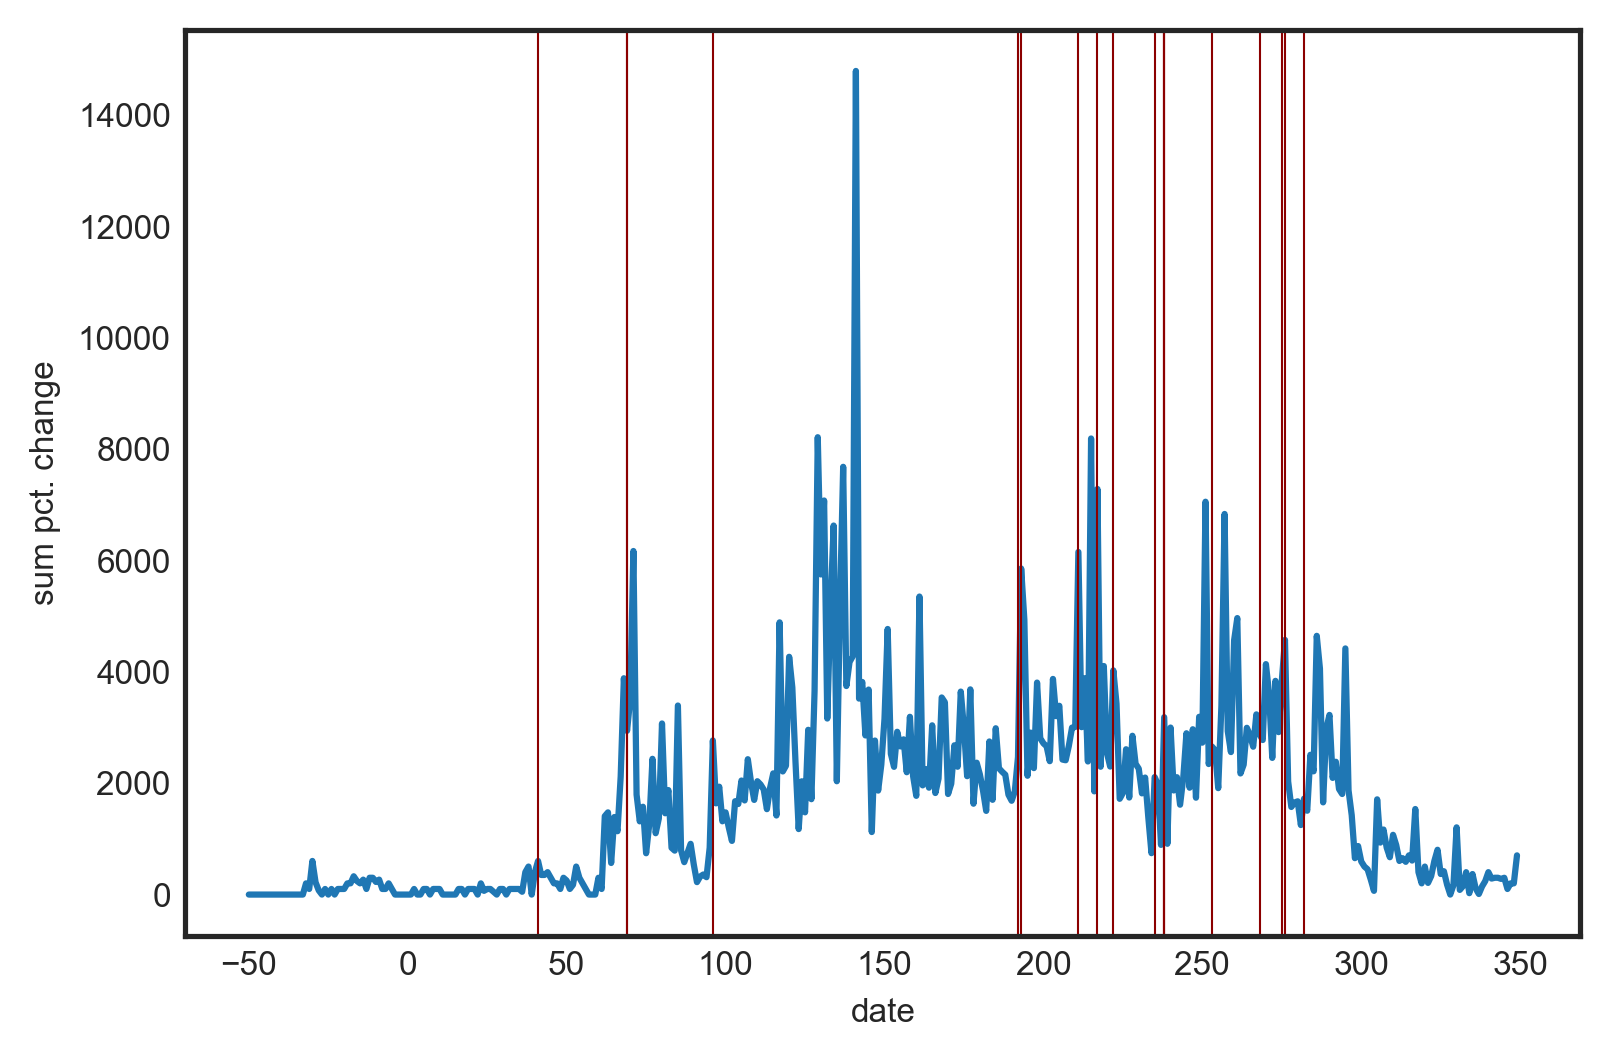

In [78]:
fig, ax = plt.subplots()

pctchange_df["sum_change"].plot(ax=ax)
for n in assassinated.index:
    assass = dict(assassinated.iloc[n])
    ax.axvline(assass["Assassinated"], color="darkred", lw=0.5)
ax.set_ylabel("sum pct. change")

# PNAS - lead pollution

In [93]:
pnas = pd.read_excel("../data/pnas.xlsx", sheet_name="Fig. 2", header=None)
pnas.head(10)

0     1  \
0  Please reference the following when using thes...   NaN   
1  McConnell, J.R., A.I. Wilson, A. Stohl, M.M. A...   NaN   
2   Lead pollution recorded in Greenland ice indi...   NaN   
3   Proc Natl Acad Sci U.S.A., doi: 10.1073/pnas....   NaN   
4                                                NaN   NaN   
5                                        Year Before  Lead   
6                                               1950  pg/g   
7                                             3185.5  2.86   
8                                             3184.5  3.86   
9                                             3183.5  2.24   

                       2  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6  Missing values -0.999  
7                    NaN  
8                    NaN  
9                    NaN

In [94]:
pnas = pnas[7:].copy()
pnas["date"] = pnas[0].apply(lambda x: 1950.5 - x)
def clean_pol(pol):
    if pol == -0.999:
        pol = np.nan
    return pol
pnas["pollution"] = pnas[1].apply(clean_pol)
pnas.head(5)

0     1    2    date  pollution
7   3185.5  2.86  NaN -1235.0       2.86
8   3184.5  3.86  NaN -1234.0       3.86
9   3183.5  2.24  NaN -1233.0       2.24
10  3182.5  1.79  NaN -1232.0       1.79
11  3181.5  1.44  NaN -1231.0       1.44

In [100]:
#pnas.set_index("date", inplace=True)
pnas[100:120]

0      1    2  pollution
date                                
100.0  1850.5   4.43  NaN       4.43
101.0  1849.5   4.07  NaN       4.07
102.0  1848.5      3  NaN       3.00
103.0  1847.5   4.77  NaN       4.77
104.0  1846.5   2.21  NaN       2.21
105.0  1845.5   5.58  NaN       5.58
106.0  1844.5   3.86  NaN       3.86
107.0  1843.5   3.38  NaN       3.38
108.0  1842.5   2.29  NaN       2.29
109.0  1841.5  10.03  NaN      10.03
110.0  1840.5   2.85  NaN       2.85
111.0  1839.5   4.81  NaN       4.81
112.0  1838.5   2.98  NaN       2.98
113.0  1837.5   2.36  NaN       2.36
114.0  1836.5   2.24  NaN       2.24
115.0  1835.5    1.9  NaN       1.90
116.0  1834.5   1.97  NaN       1.97
117.0  1833.5   2.68  NaN       2.68
118.0  1832.5   10.1  NaN      10.10
119.0  1831.5   2.03  NaN       2.03
120.0  1830.5   1.41  NaN       1.41

In [72]:
pnas['pollution'].interpolate().rolling(11, center=True).mean()

7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
        ..
2039   NaN
2040   NaN
2041   NaN
2042   NaN
2043   NaN
Name: pollution, Length: 2037, dtype: float64

(-50.0, 350.0)

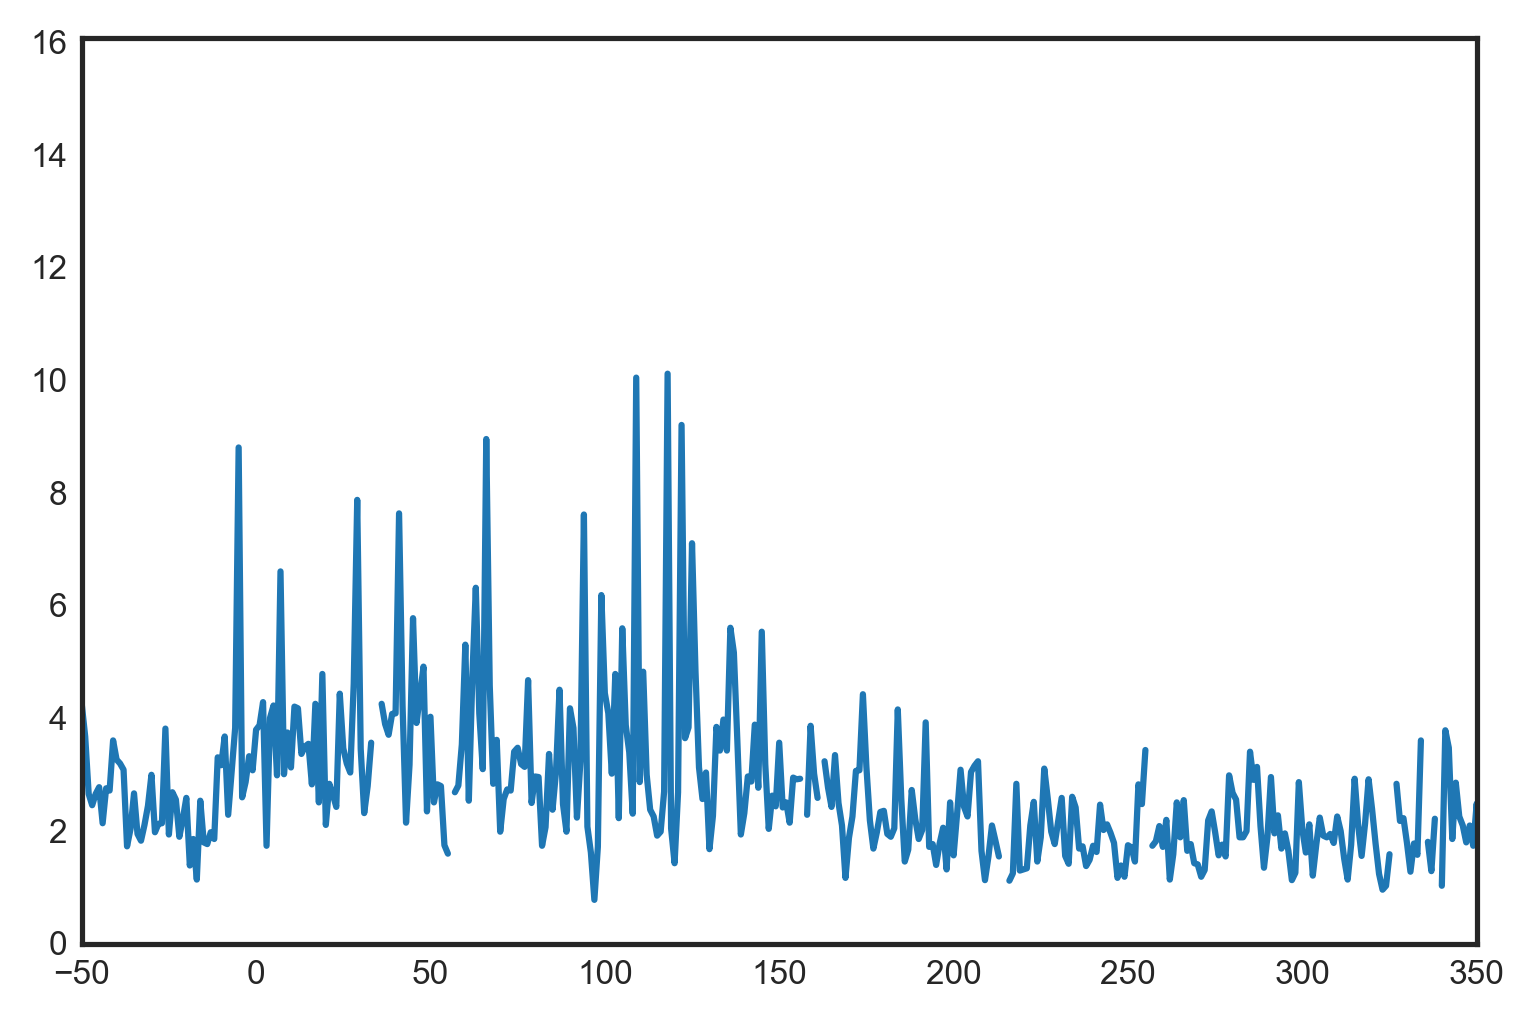

In [101]:
fig,ax = plt.subplots()
ax.plot(pnas["pollution"])
ax.set_xlim(-50,350)

(-50.0, 350.0)

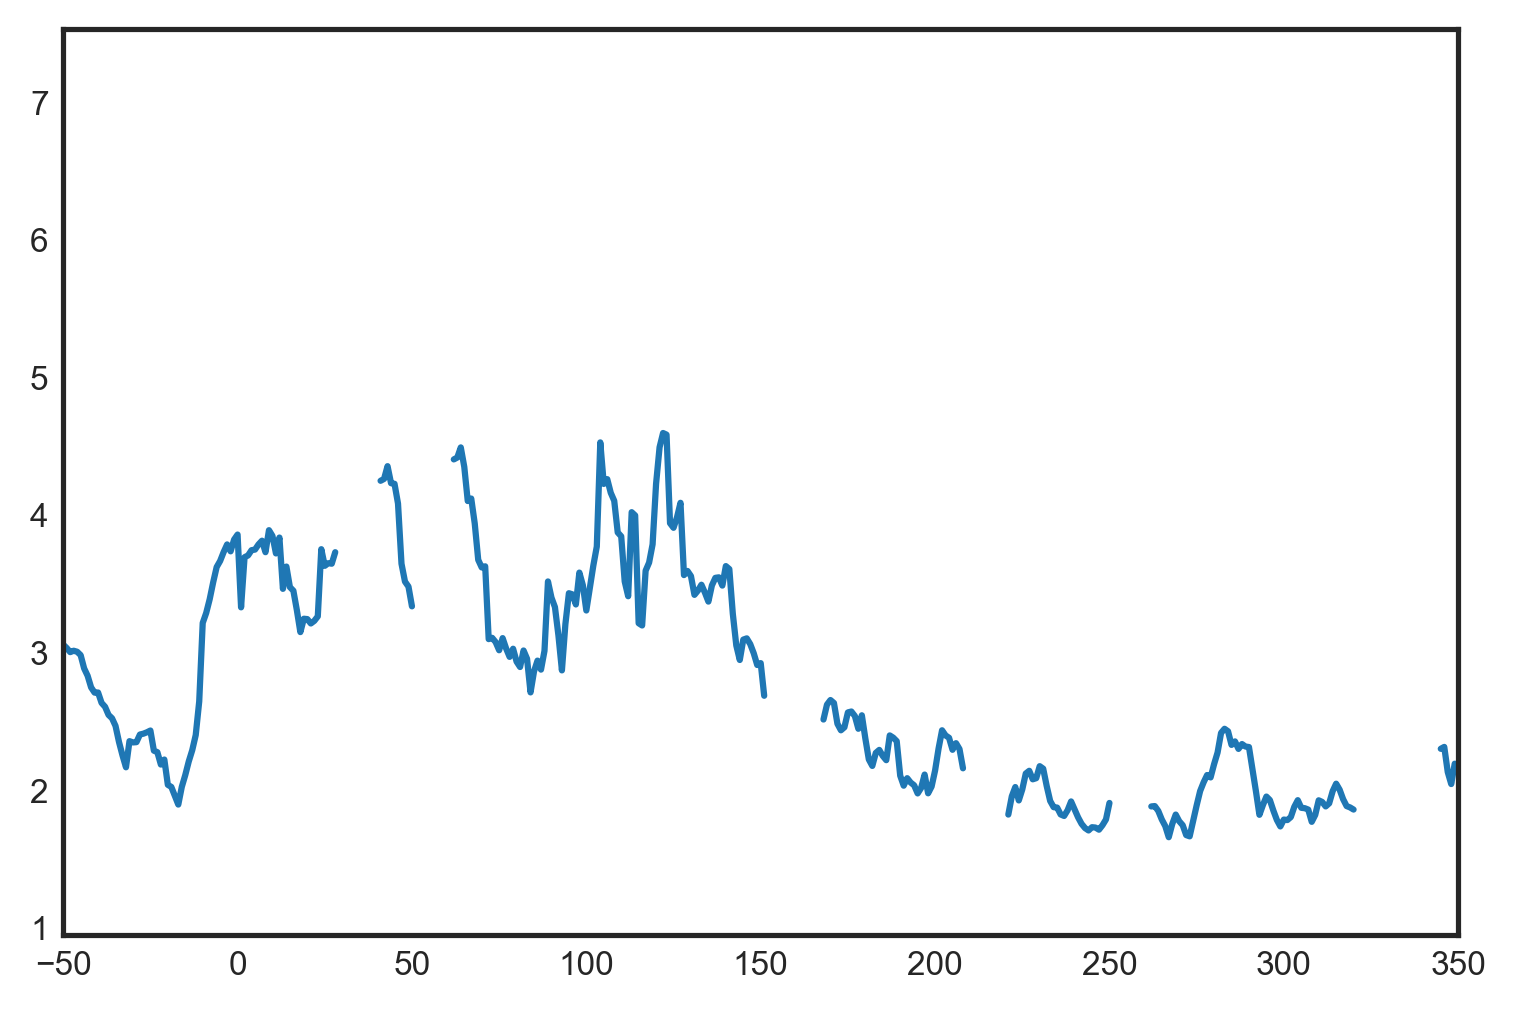

In [103]:
fig,ax = plt.subplots()
ax.plot(pnas["pollution"].rolling(11, center=True).mean())
ax.set_xlim(-50,350)

In [105]:
pnas['pollution_interpol'] = pnas['pollution'].interpolate()

(-50.0, 350.0)

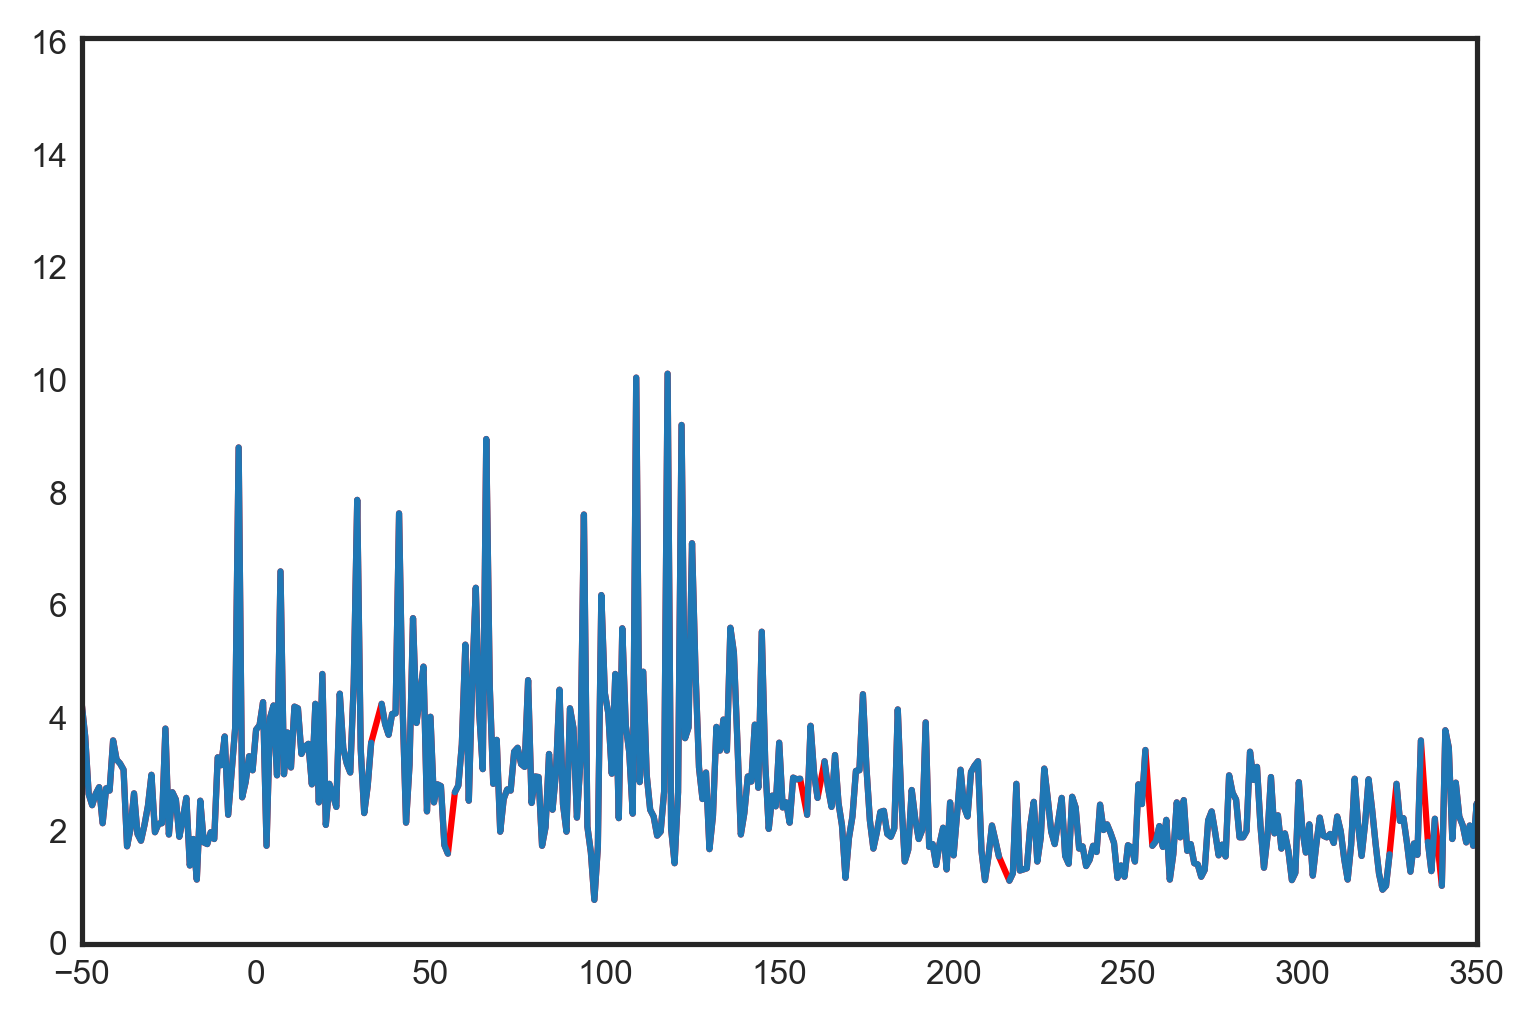

In [108]:
fig, ax = plt.subplots()
ax.plot(pnas["pollution_interpol"], color="red")
ax.plot(pnas["pollution"])
ax.set_xlim(-50, 350)

(-50.0, 350.0)

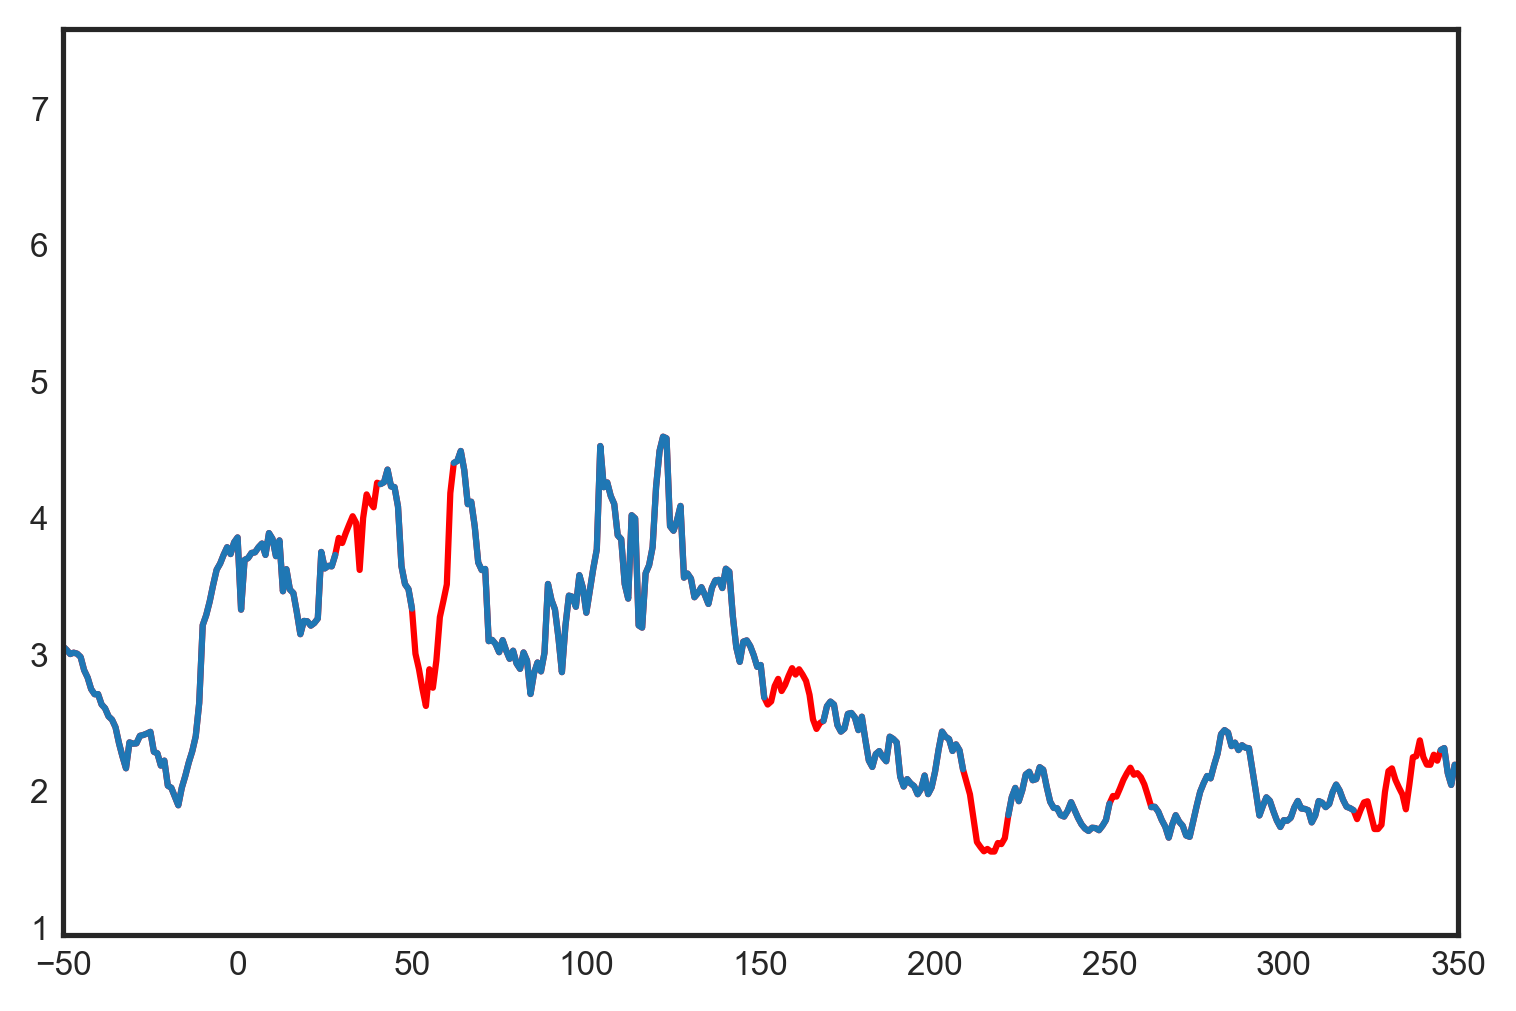

In [111]:
fig, ax = plt.subplots()
ax.plot(pnas["pollution_interpol"].rolling(11, center=True).mean(), color="red")
ax.plot(pnas["pollution"].rolling(11, center=True).mean())
ax.set_xlim(-50, 350)

In [112]:
date_freqs_df

Victory  Pax  Venus  Mars  Aurora  Apollo  Pegasus  Diana  Pan  Sicilia  \
date                                                                            
-50       0.0  0.0    0.0   0.0     0.0     0.0      0.0    0.0  0.0      0.0   
-49       0.0  0.0    0.0   0.0     0.0     0.0      0.0    0.0  0.0      0.0   
-48       0.0  0.0    0.0   0.0     0.0     0.0      0.0    0.0  0.0      0.0   
-47       0.0  0.0    0.0   0.0     0.0     0.0      0.0    0.0  0.0      0.0   
-46       0.0  0.0    0.0   0.0     0.0     0.0      0.0    0.0  0.0      0.0   
...       ...  ...    ...   ...     ...     ...      ...    ...  ...      ...   
 345      1.0  0.0    0.0   0.0     0.0     0.0      0.0    0.0  0.0      0.0   
 346      0.0  0.0    0.0   0.0     0.0     0.0      0.0    0.0  0.0      0.0   
 347      0.0  0.0    0.0   0.0     0.0     0.0      0.0    0.0  0.0      0.0   
 348      0.0  0.0    0.0   0.0     0.0     0.0      0.0    0.0  0.0      0.0   
 349      2.0  0.0    0.0   0.0     0.0     0.0      0.0    0.0  0.0      0.0   

      ...  Caritas  Colapis  Tempus  Parcae  Equitas  Quies  Alamannia  \
date  ...                                                                
-50   ...      0.0      0.0     0.0     0.0      0.0    0.0        0.0   
-49   ...      0.0      0.0     0.0     0.0      0.0    0.0        0.0   
-48   ...      0.0      0.0     0.0     0.0      0.0    0.0        0.0   
-47   ...      0.0      0.0     0.0     0.0      0.0    0.0        0.0   
-46   ...      0.0      0.0     0.0     0.0      0.0    0.0        0.0   
...   ...      ...      ...     ...     ...      ...    ...        ...   
 345  ...      0.0      0.0     0.0     0.0      0.0    0.0        0.0   
 346  ...      0.0      0.0     0.0     0.0      0.0    0.0        0.0   
 347  ...      0.0      0.0     0.0     0.0      0.0    0.0        0.0   
 348  ...      0.0      0.0     0.0     0.0      0.0    0.0        0.0   
 349  ...      0.0      0.0     0.0     0.0      0.0    0.0        0.0   

      Francia  Sarmatia  Constantinopolis  
date                                       
-50       0.0       0.0               0.0  
-49       0.0       0.0               0.0  
-48       0.0       0.0               0.0  
-47       0.0       0.0               0.0  
-46       0.0       0.0               0.0  
...       ...       ...               ...  
 345      0.0       0.0               0.0  
 346      0.0       0.0               0.0  
 347      0.0       0.0               0.0  
 348      0.0       0.0               2.0  
 349      0.0       0.0               1.0  

[400 rows x 163 columns]

In [113]:
deities_top20

['Victory',
 'Pax',
 'Mars',
 'Roma',
 'Fortuna',
 'Felicitas',
 'Providentia',
 'Concordia',
 'Salus',
 'Minerva',
 'Sol',
 'Liberalitas',
 'Aequitas',
 'Spes',
 'Hercules',
 'Pietas',
 'Fides',
 'Genius',
 'Securitas',
 'Venus']

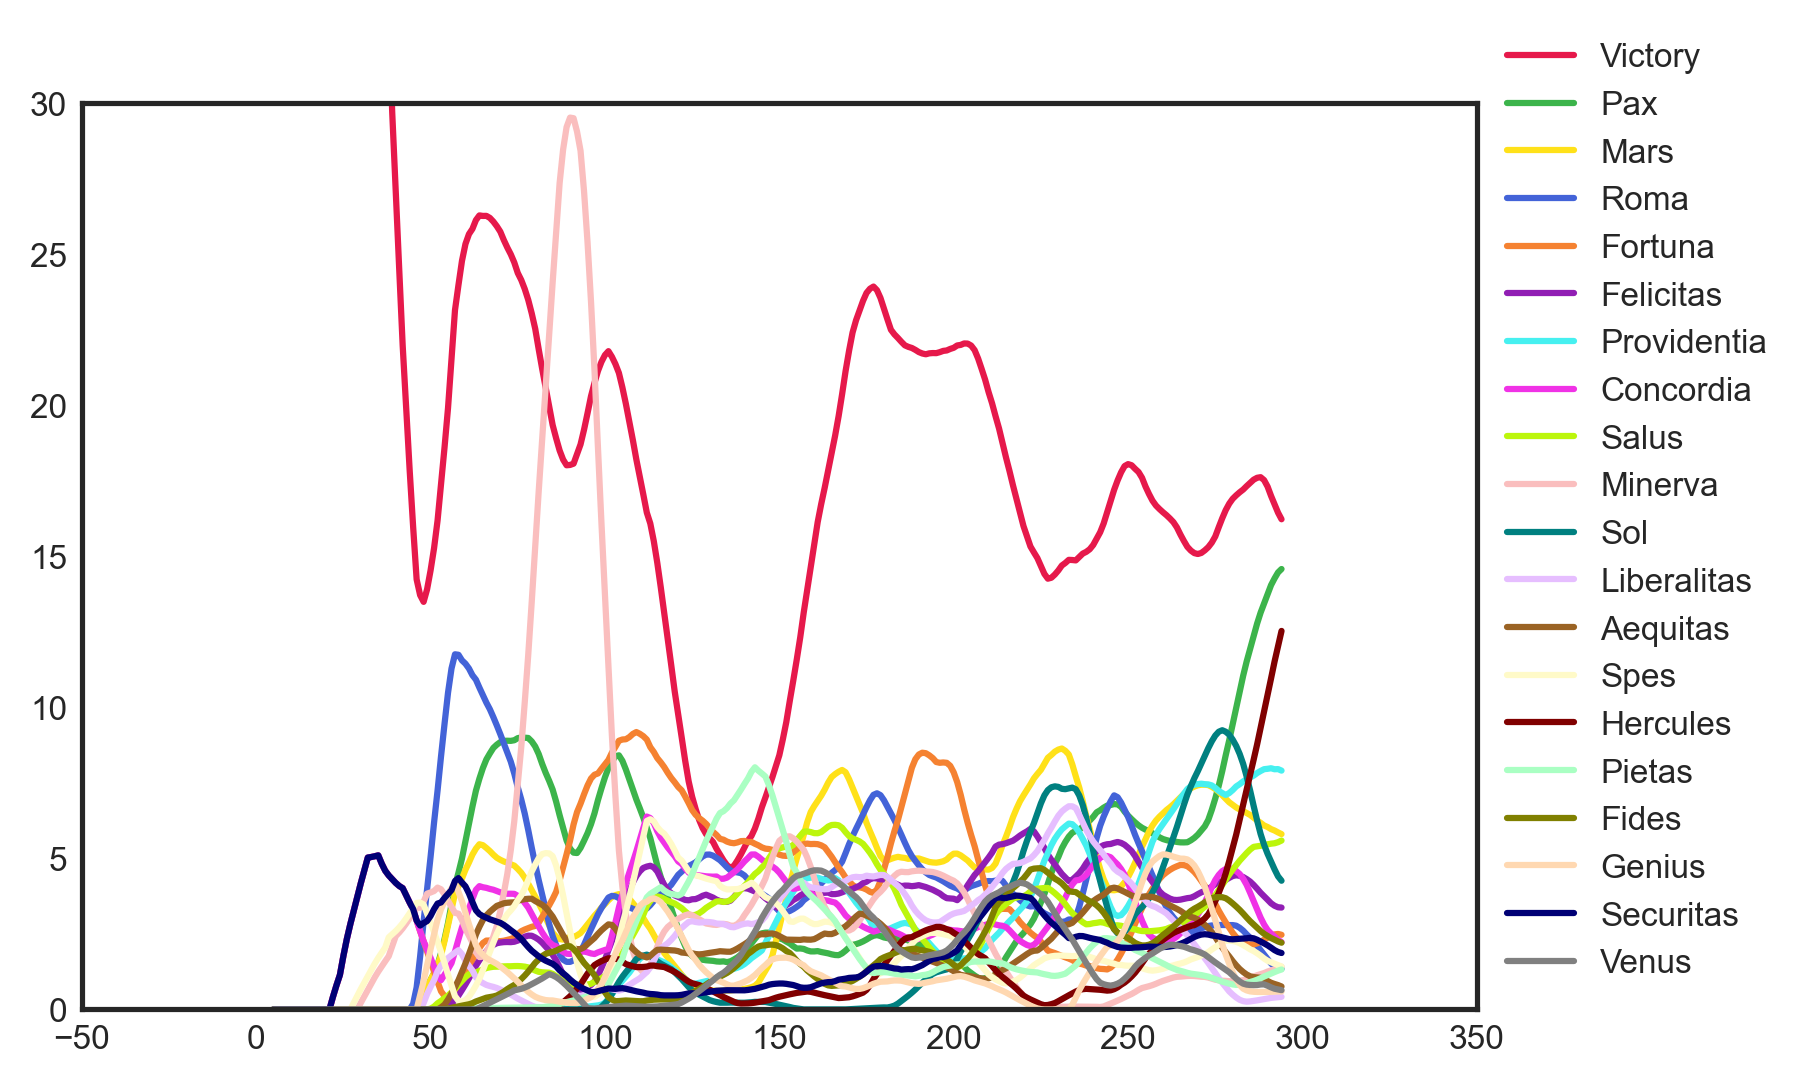

In [81]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_top20, colors):
    ax.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax.set_xlim(-50, 350)
ax.set_ylim(0,30)
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

In [82]:
def check_deity(deities_list, deity):
    if deity in deities_list:
        return True
    else:
        return False

<AxesSubplot:xlabel='date_random', ylabel='Density'>

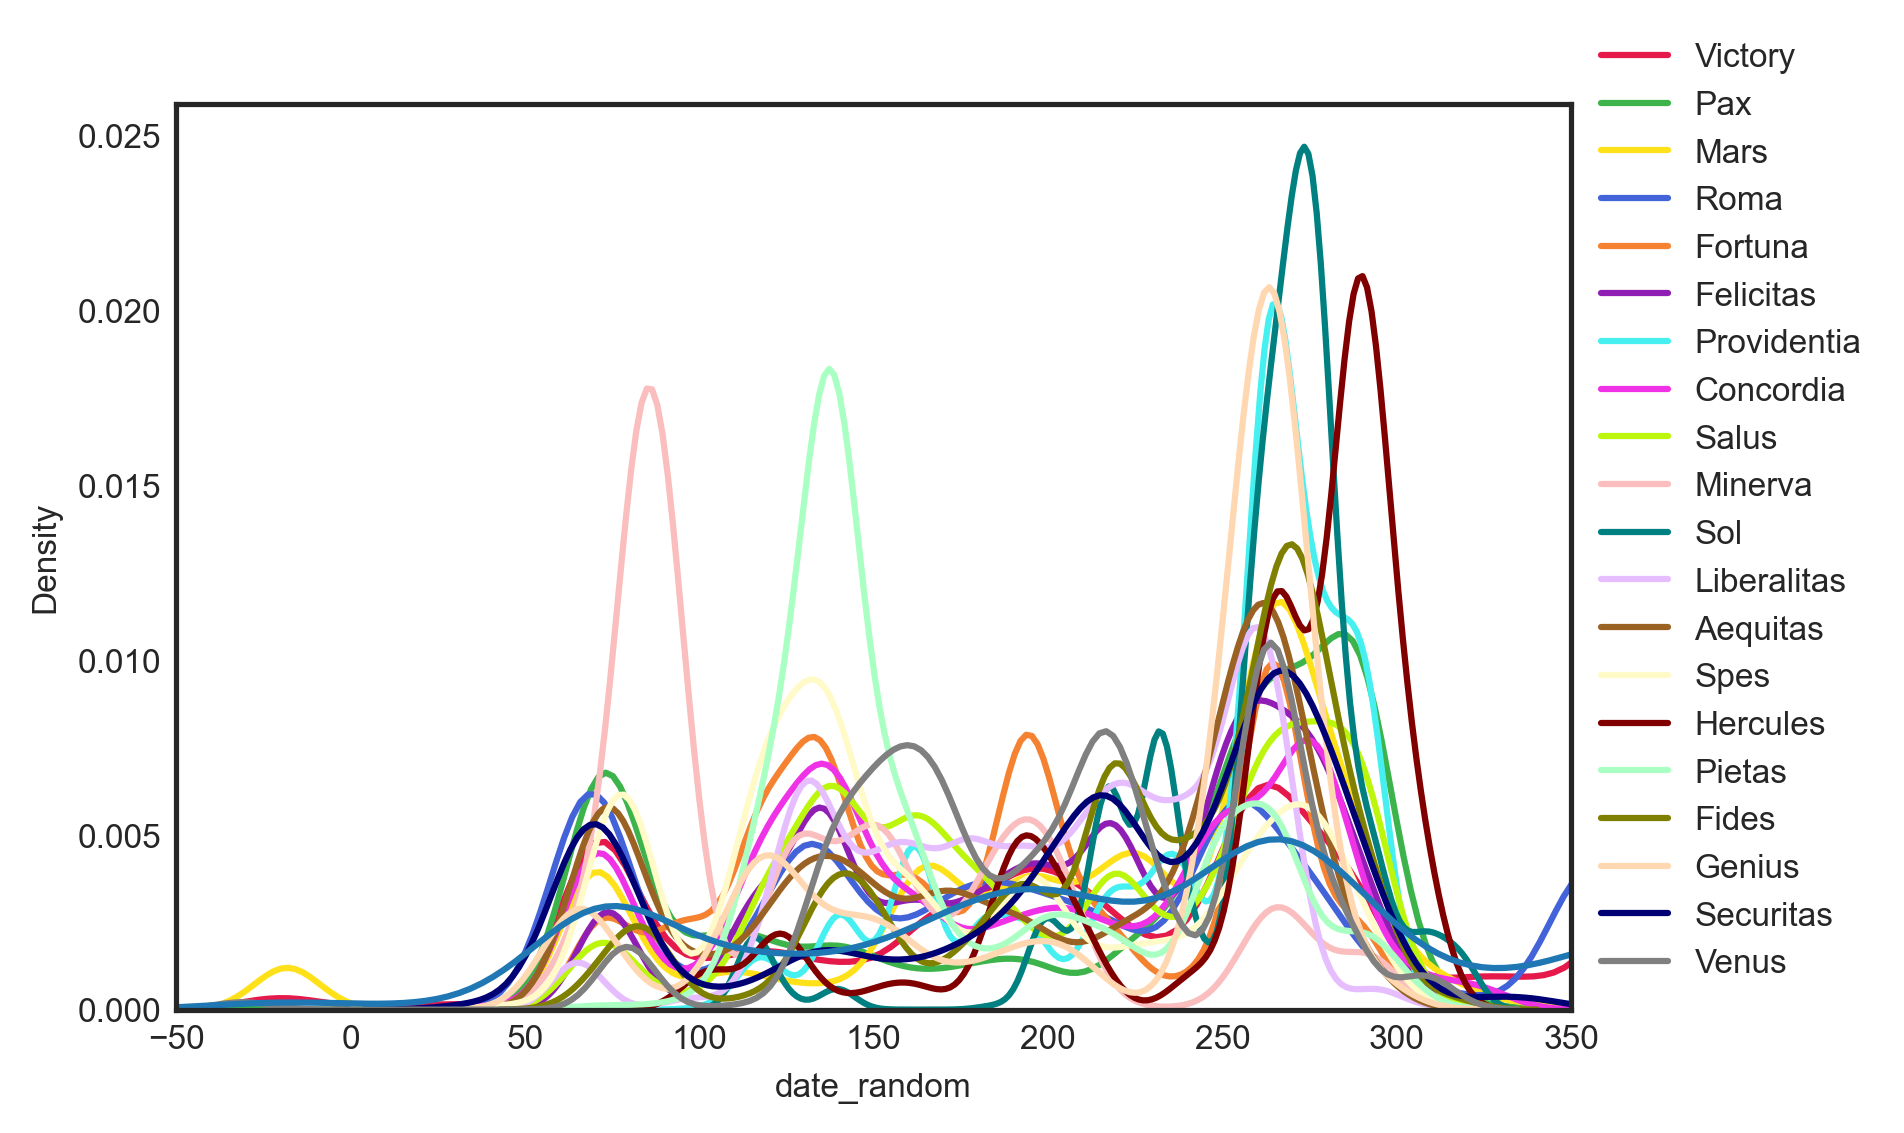

In [46]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_top20, colors):
    sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, deity))]["date_random"], color=color, label=deity, bw_adjust=0.5)
ax.set_xlim(-50, 350)
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, "Victory"))]["date_random"])

In [47]:
deities_select = ["Mars", "Pax", "Securitas", "Aequitas", "Felicitas", "Salus", "Fortuna", "Spes", "Pietas"]

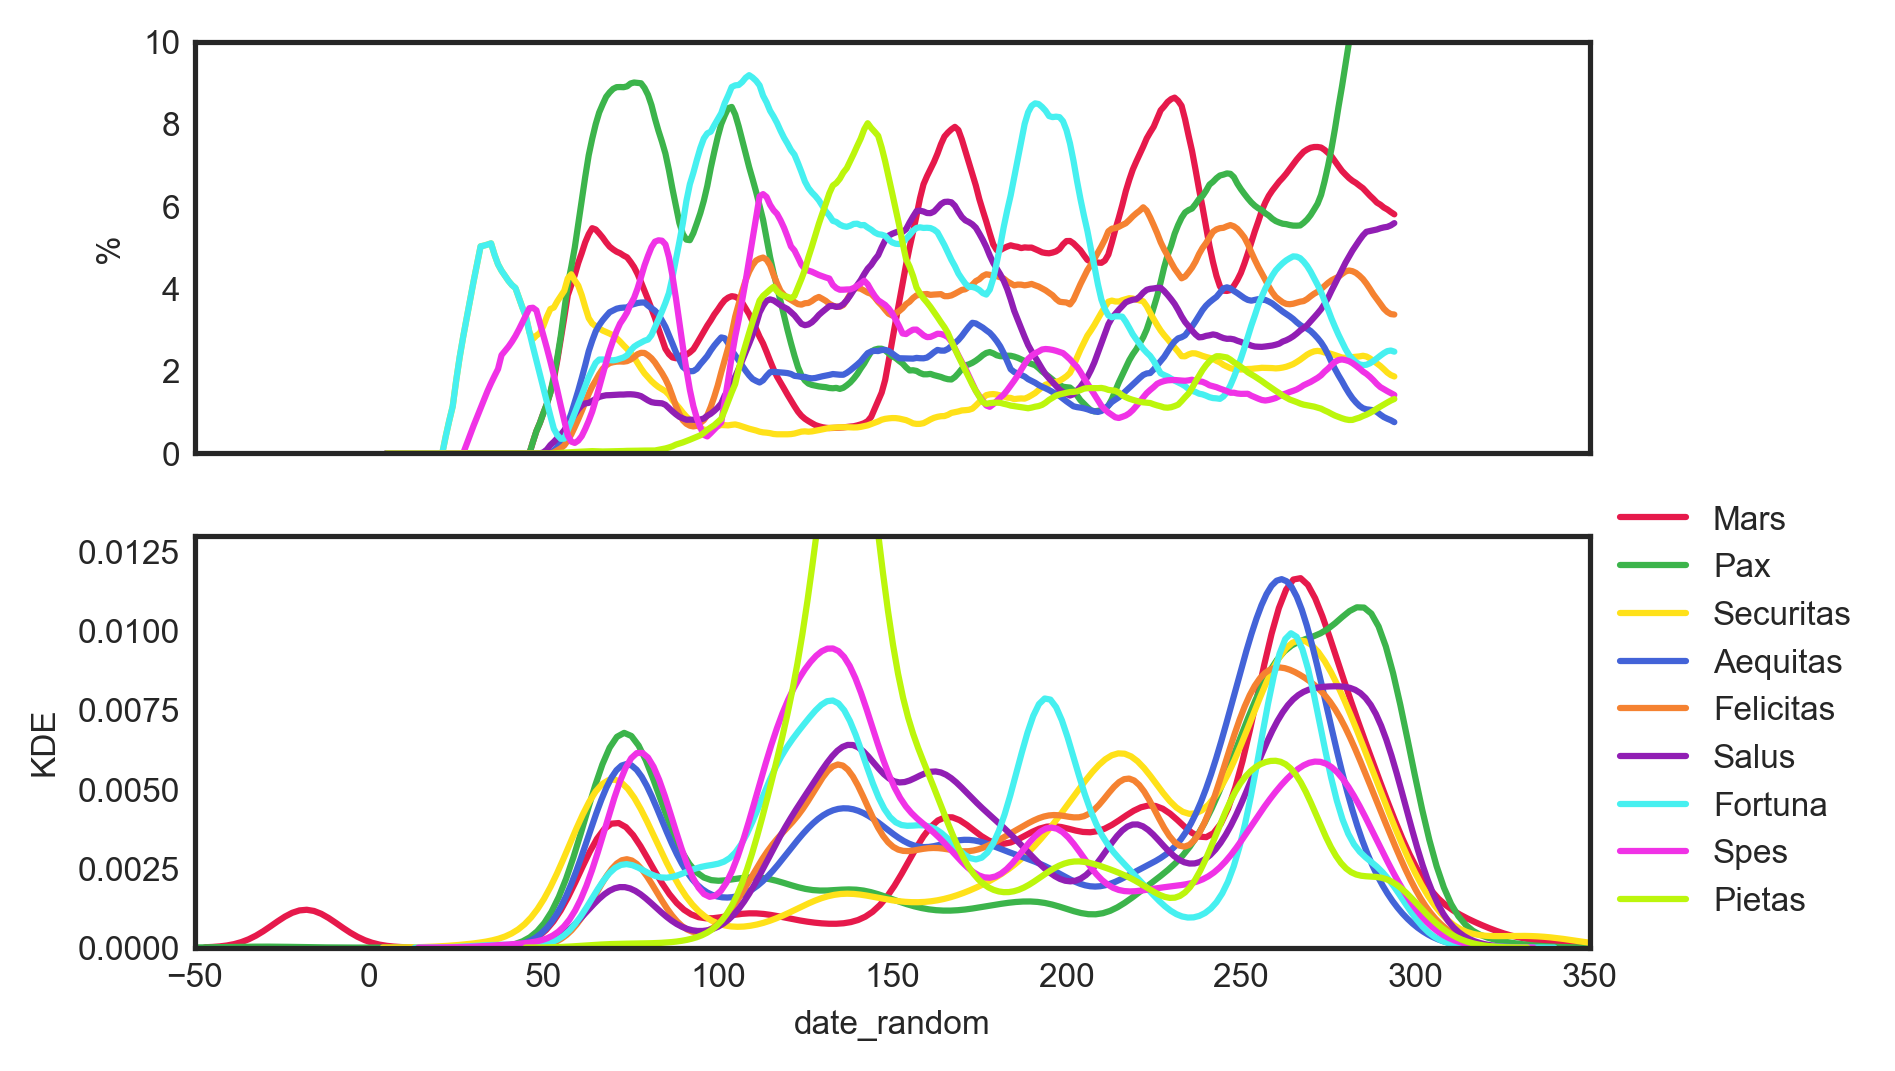

In [83]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

fig, [ax1, ax2] = plt.subplots(2,1)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_select, colors):
    ax1.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax1.set_xlim(-50, 350)
ax1.set_ylim(0,10)
ax1.set_ylabel("%")
ax1.set_xticklabels([])
#ax1.legend(loc="lower left", bbox_to_anchor=(1,0))

for deity, color in zip(deities_select, colors):
    sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, deity))]["date_random"], color=color, label=deity, bw_adjust=0.5, ax=ax2)
ax2.set_xlim(-50, 350)
ax2.set_ylim(0, 0.013)
ax2.set_ylabel("KDE")
ax2.legend(loc="lower left", bbox_to_anchor=(1,0))

In [49]:
#task: coins_by_date

# Wars and battles

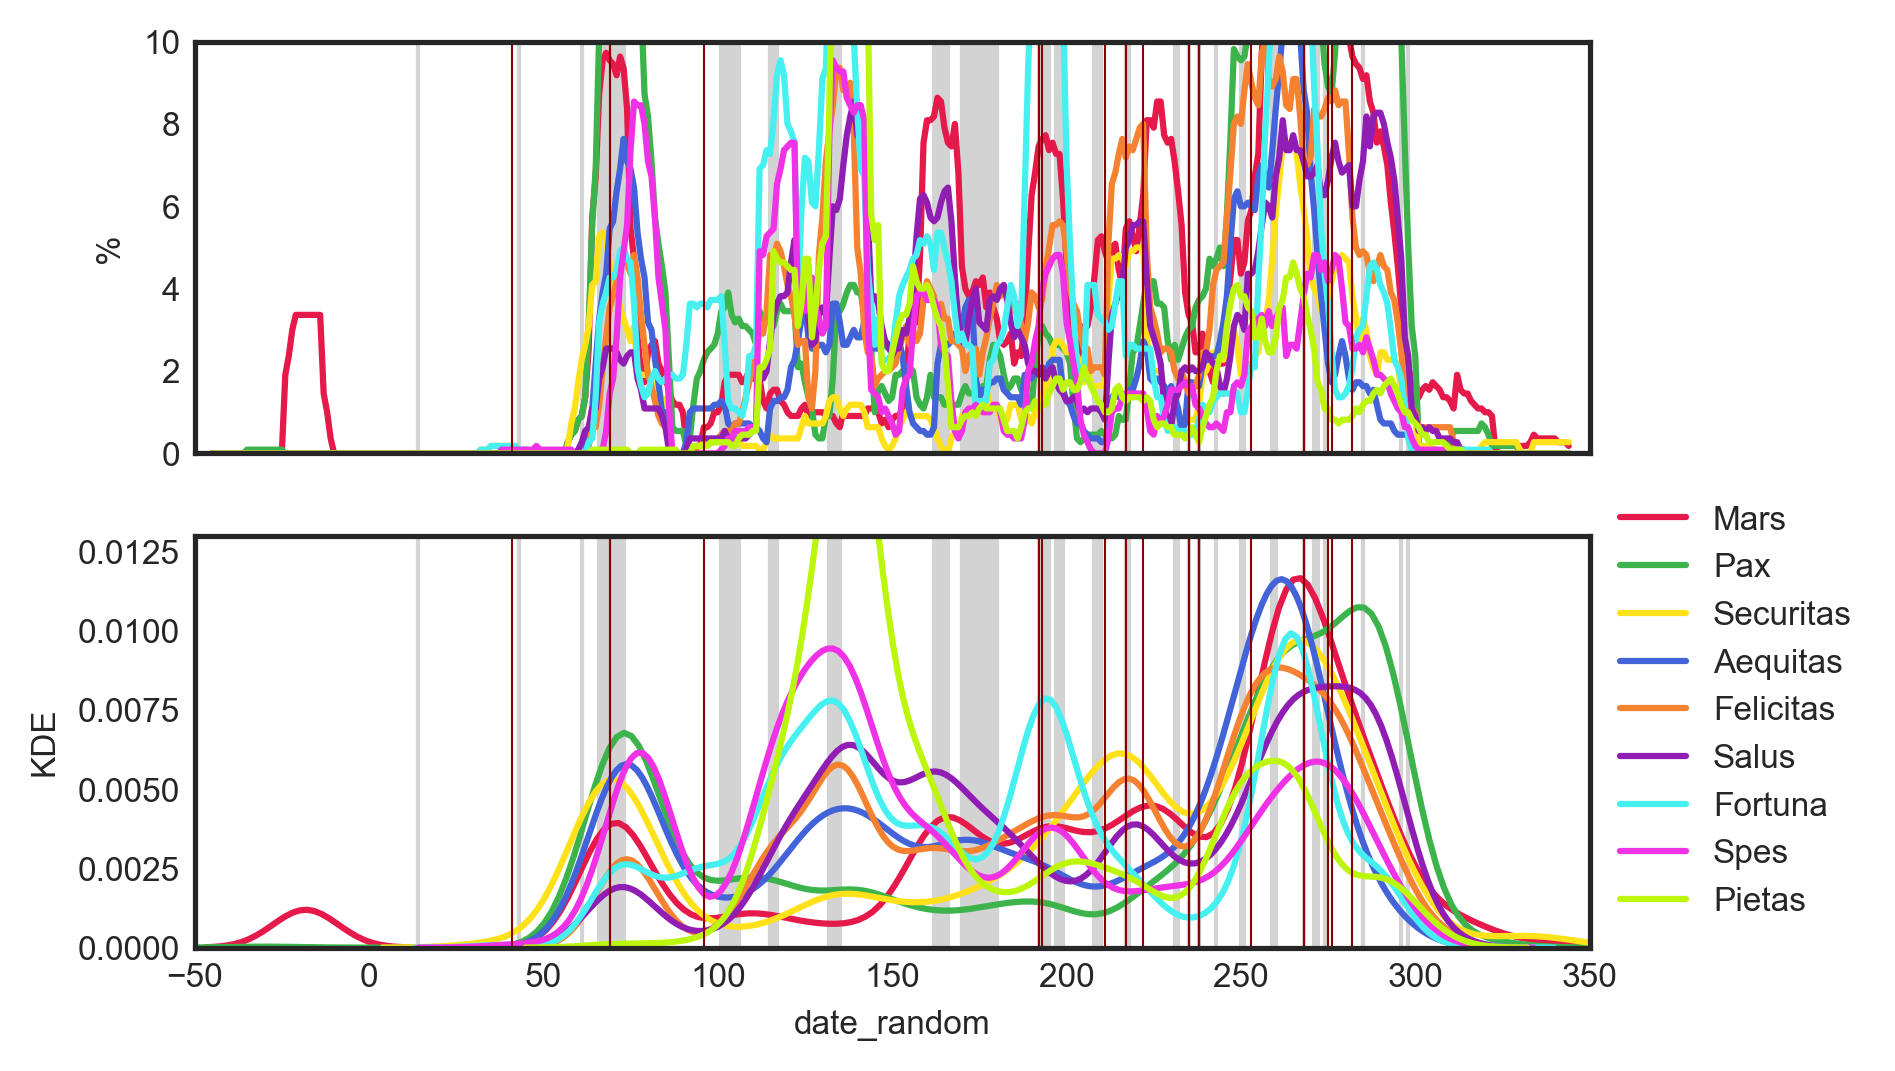

In [58]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

fig, [ax1, ax2] = plt.subplots(2,1)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_select, colors):
    ax1.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax1.set_xlim(-50, 350)
ax1.set_ylim(0,10)
ax1.set_ylabel("%")
ax1.set_xticklabels([])
#ax1.legend(loc="lower left", bbox_to_anchor=(1,0))

for deity, color in zip(deities_select, colors):
    sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, deity))]["date_random"], color=color, label=deity, bw_adjust=0.5, ax=ax2)
ax2.set_xlim(-50, 350)
ax2.set_ylim(0, 0.013)
ax2.set_ylabel("KDE")
ax2.legend(loc="lower left", bbox_to_anchor=(1,0))

for n in wars.index:
    war = dict(wars.iloc[n])
    ax1.axvspan(war["Start_date"], war["End_date"], color="lightgrey")
    ax2.axvspan(war["Start_date"], war["End_date"], color="lightgrey")

for n in assassinated.index:
    assass = dict(assassinated.iloc[n])
    ax1.axvline(assass["Assassinated"], color="darkred", lw=0.5)
    ax2.axvline(assass["Assassinated"], color="darkred", lw=0.5)


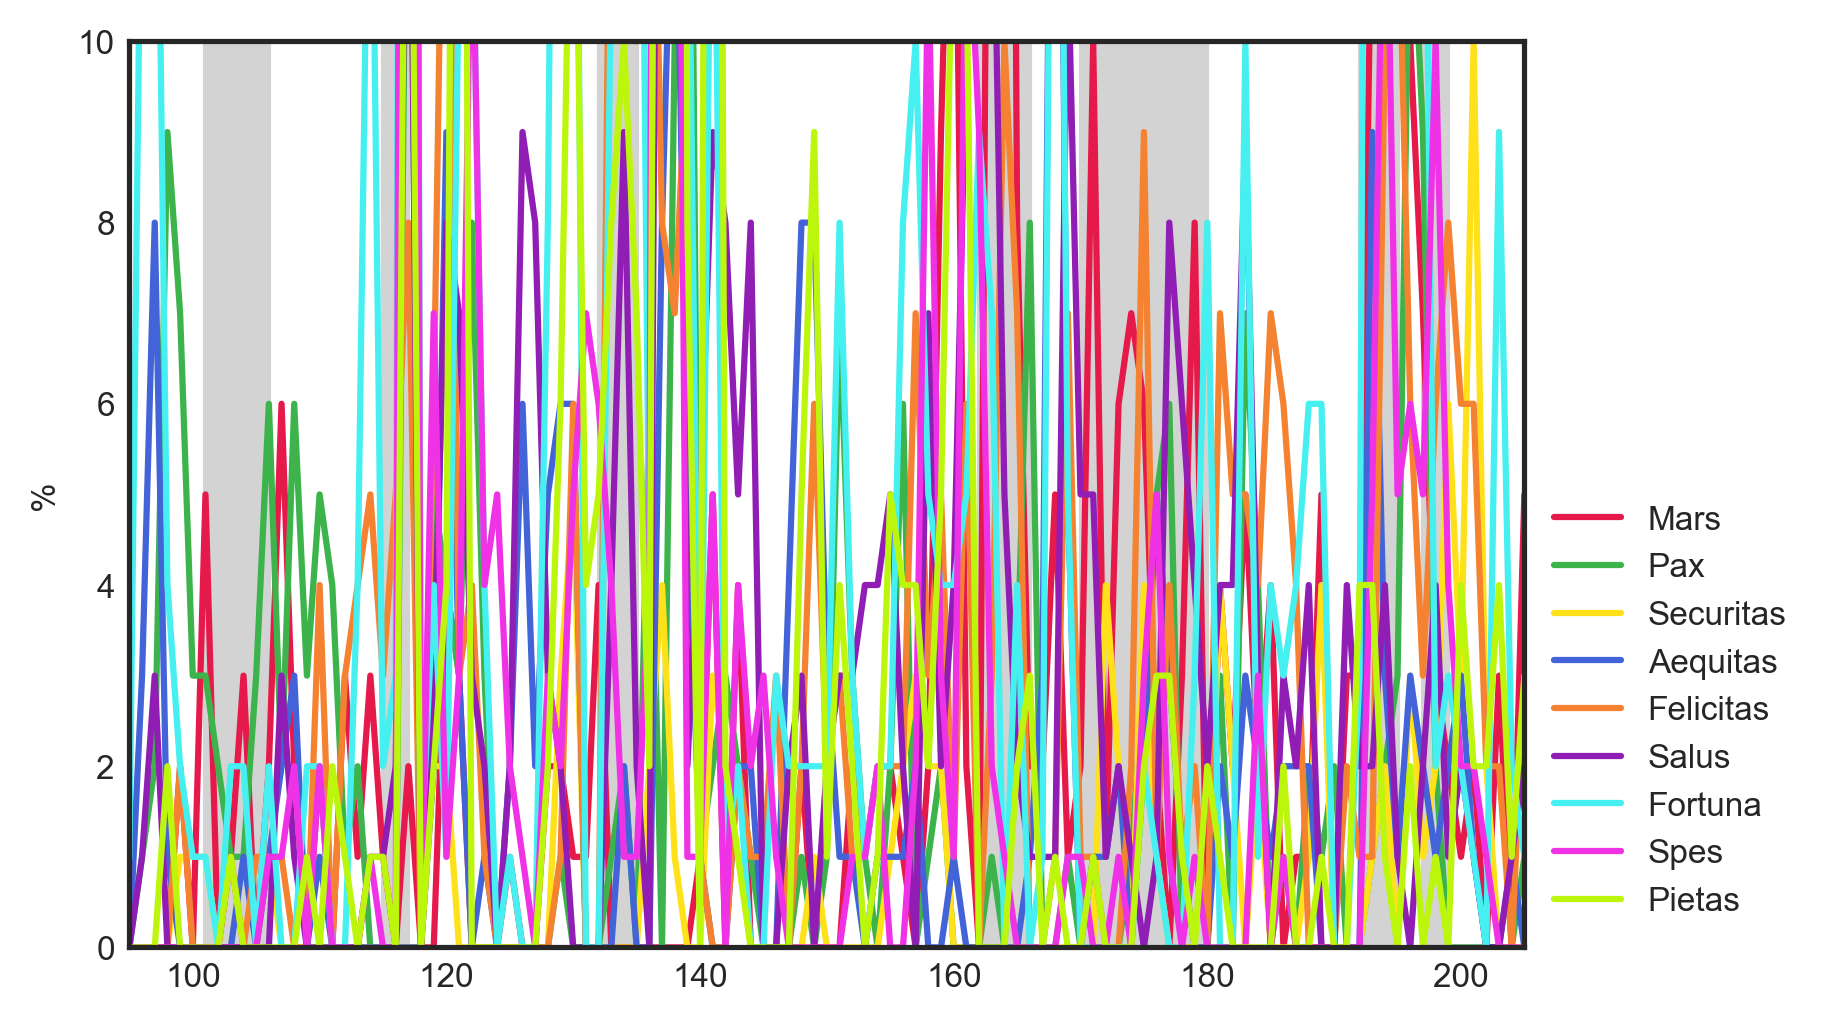

In [60]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

fig, ax = plt.subplots()
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_select, colors):
    ax.plot(date_freqs_df[deity], color=color, label=deity)
    #ax.plot(date_freqs_df.index, date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax.set_xlim(0, 300)
ax.set_ylim(0,10)
ax.set_ylabel("%")
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

ax.set_xlim(95,205)

for n in wars.index:
    war = dict(wars.iloc[n])
    ax.axvspan(war["Start_date"], war["End_date"], color="lightgrey")# , alpha=0.5)

# Exploring inscriptions

In [101]:
# experiments with LIRE
LIRE = gpd.read_file("/Users/kasev//Projects/LIRE_ETL/data/large_data/LIRE_v1-2.geojson", driver="GeoJSON")

In [102]:
LIRE.groupby("type_of_inscription_auto").size().sort_values(ascending=False)

type_of_inscription_auto
epitaph                            74578
votive inscription                 15700
owner/artist inscription           10460
honorific inscription               5573
building/dedicatory inscription     3241
mile-/leaguestone                   2536
identification inscription          1910
acclamation                          443
boundary inscription                 410
military diploma                     329
list                                 294
defixio                              292
letter                               288
label                                273
elogium                              150
public legal inscription             132
seat inscription                      54
private legal inscription             37
prayer                                23
assignation inscription               16
calendar                              13
adnuntiatio                            1
dtype: int64

In [103]:
deities_morphs = {
    "Pax" :     ["Pax", "Pacis", "Paci", "Pacem", "Pace"],
    "Mars":     ["Mars", "Martis", "Marti", "Martem", "Marte"],
    "Securitas":     ["Securitas", "Securitatis", "Securitati", "Securitatem", "Securitate"],
    "Aequitas":     ["Aequitas", "Aequitatis", "Aequitati", "Aequitatem", "Aequitate"],
    "Felicitas":     ["Felicitas", "Felicitatis", "Felicitati", "Felicitatem", "Felicitate"],
    "Salus":     ["Salus", "Salutis", "Saluti", "Salutem", "Salute"],
    "Fortuna":     ["Fortuna", "Fortunae", "Fortunam", "Fortunā"],
    "Spes":     ["Spes", "Spei", "Spem", "Spe"],
    "Pietas":     ["Pietas", "Pietatis", "Pietati", "Pietatem", "Pietate"]
}

In [104]:
# older functional version
def extract_deities(inscription_text):
    deities_found = []
    if not isinstance(inscription_text, str): # if not valid string
        inscription_text = ""
    for deity in deities_morphs.keys():
        for deity_morph in deities_morphs[deity]:
            try:
                if deity_morph in inscription_text: # first check it this way, otherwise skip
                    deity_morph_N = len(re.findall("(\W|^)" + deity_morph + "(\W|$)", inscription_text))
                    if deity_morph_N > 0:
                        deities_found.extend([deity] * deity_morph_N)
                        inscription_text = re.sub("(\W|^)(" + deity_morph + ")(\W|$)", r"\1", inscription_text)
            except: pass
    return deities_found

In [105]:
LIRE["deities"] = LIRE["clean_text_interpretive_word"].apply(extract_deities)

In [106]:
LIRE[LIRE["deities"].apply(bool)]["deities"].tolist()[:3]

[['Mars'], ['Fortuna'], ['Pax']]

In [107]:
LIRE[LIRE["deities"].apply(bool)].sample(100, random_state=0)[["EDCS-ID", "EDH-ID", "not_before", "not_after", "clean_text_interpretive_word", "deities"]].to_csv("../data/lire_deities_sample.csv")

In [108]:
deity = "Fortuna"
len(LIRE[LIRE["deities"].apply(lambda x: deity in x)])

595

In [109]:
LIRE["random_dates"] = LIRE.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], 1000), axis=1)

In [110]:
LIRE_deities = LIRE[LIRE["deities"].apply(bool)].copy()

[[<matplotlib.patches.Polygon at 0x31e8b7160>],

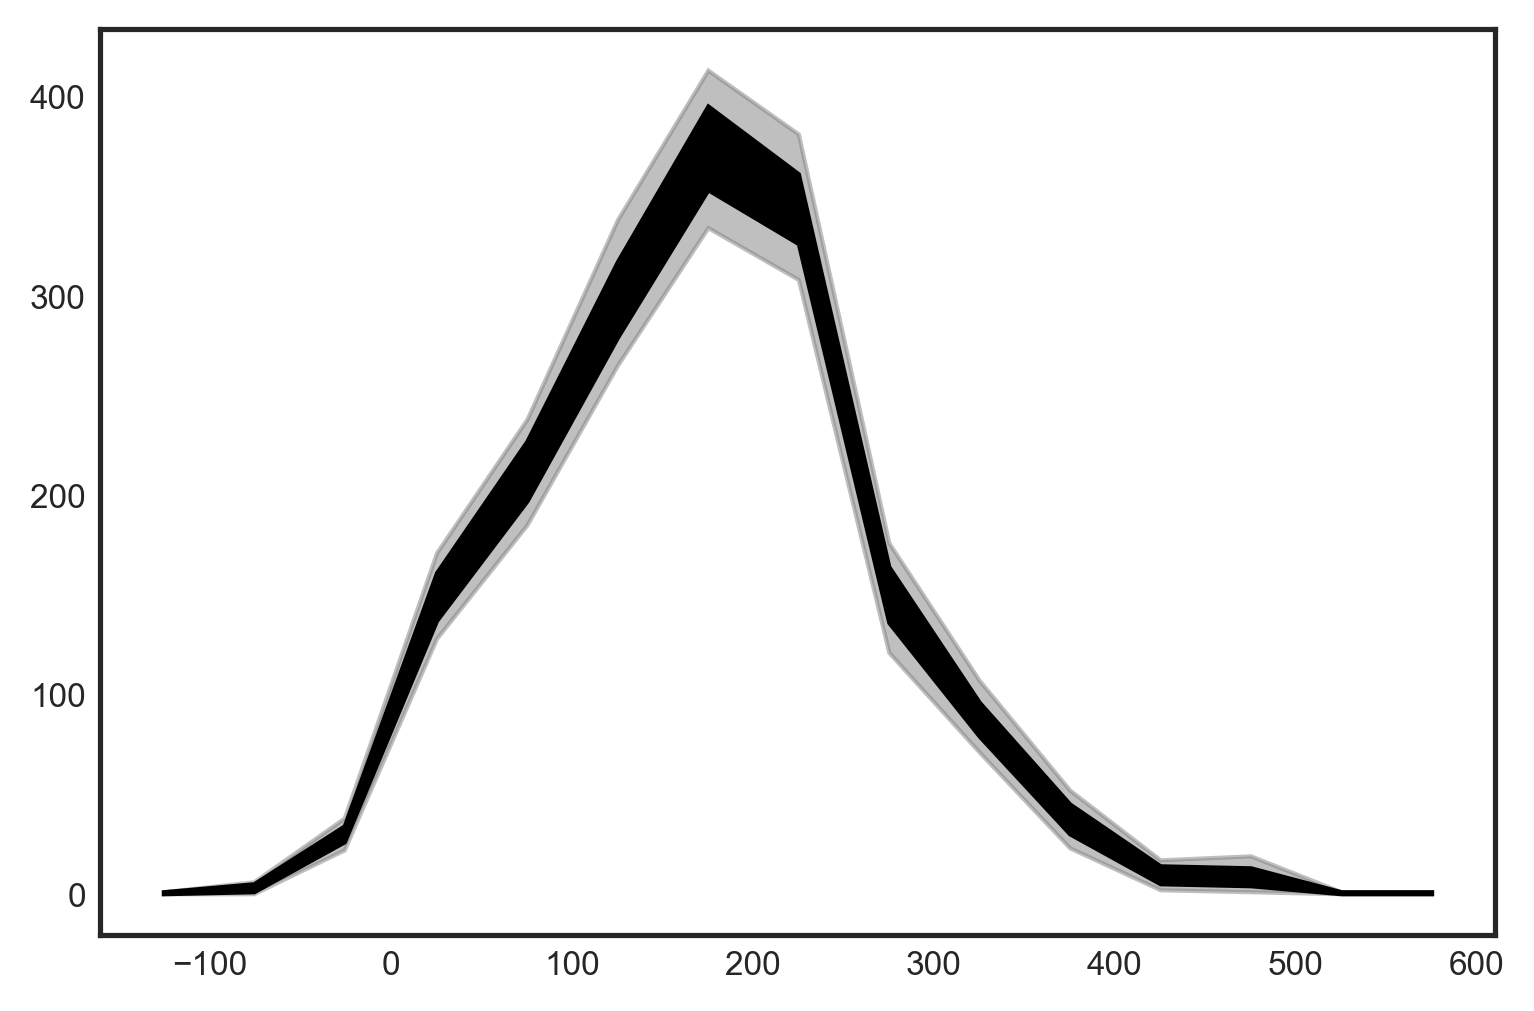

In [111]:
tempun.timeblocksplot_from_randoms(LIRE_deities["random_dates"])

In [112]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

colors_dict = dict(zip(deities_morphs.keys(), colors[:len(deities_morphs.keys())]))
colors_dict

{'Pax': '#e6194b',
 'Mars': '#3cb44b',
 'Securitas': '#ffe119',
 'Aequitas': '#4363d8',
 'Felicitas': '#f58231',
 'Salus': '#911eb4',
 'Fortuna': '#46f0f0',
 'Spes': '#f032e6',
 'Pietas': '#bcf60c'}

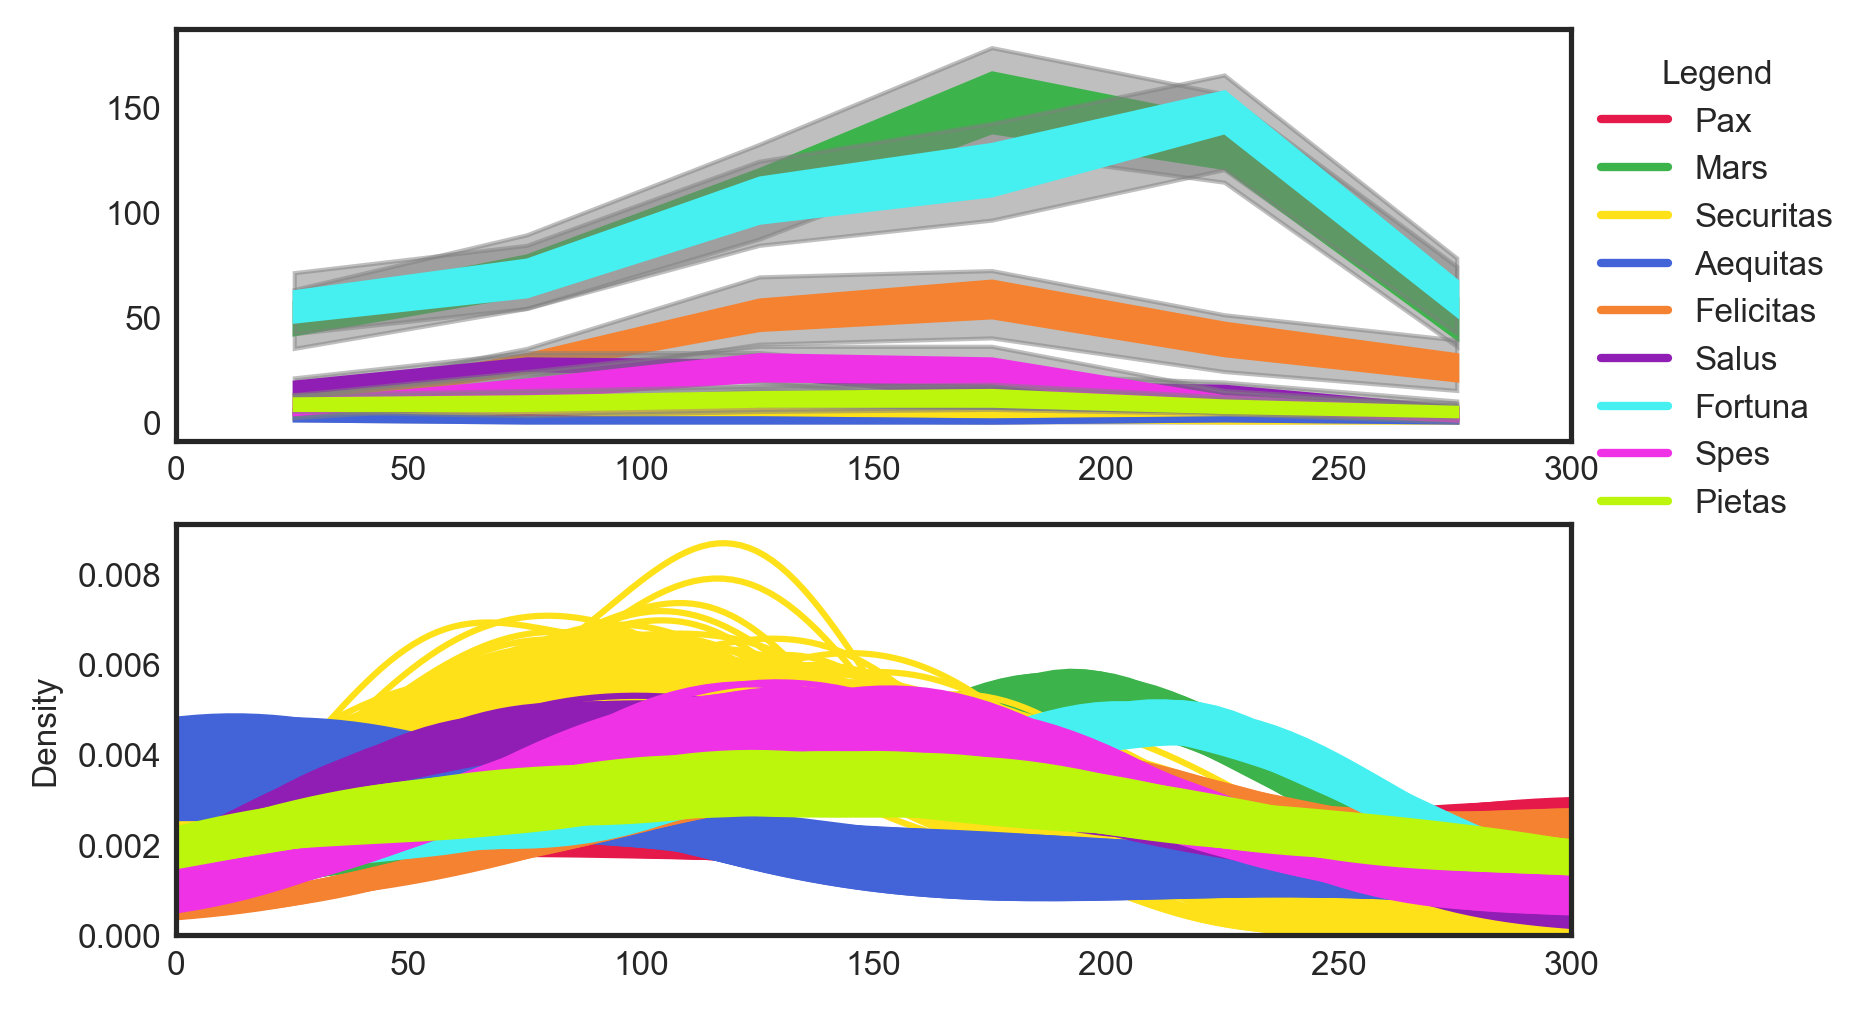

In [113]:
fig, [ax1, ax2] = plt.subplots(2,1)

for deity in deities_morphs.keys():
    deity_df = LIRE[LIRE["deities"].apply(lambda x: deity in x)]
    tempun.timeblocksplot_from_randoms(deity_df["random_dates"], timeblocks=[0,300,50], color=colors_dict[deity], ax=ax1)
    tempun.kdeplot_from_randoms(deity_df["random_dates"], color=colors_dict[deity], ax=ax2)
    #sims = tempun.get_simulation_variants(deity_df["random_dates"])
    #for sim in sims[:100]:
    #    sns.kdeplot(sim, ax=ax2, color=colors_dict[deity])
ax1.set_xlim(0,300)
ax2.set_xlim(0,300)

markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors_dict.values()]
ax1.legend(markers, colors_dict.keys(), numpoints=1,  title="Legend", bbox_to_anchor=(1, 1), loc='upper left')

/Users/kasev/Projects/coins/coins_venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


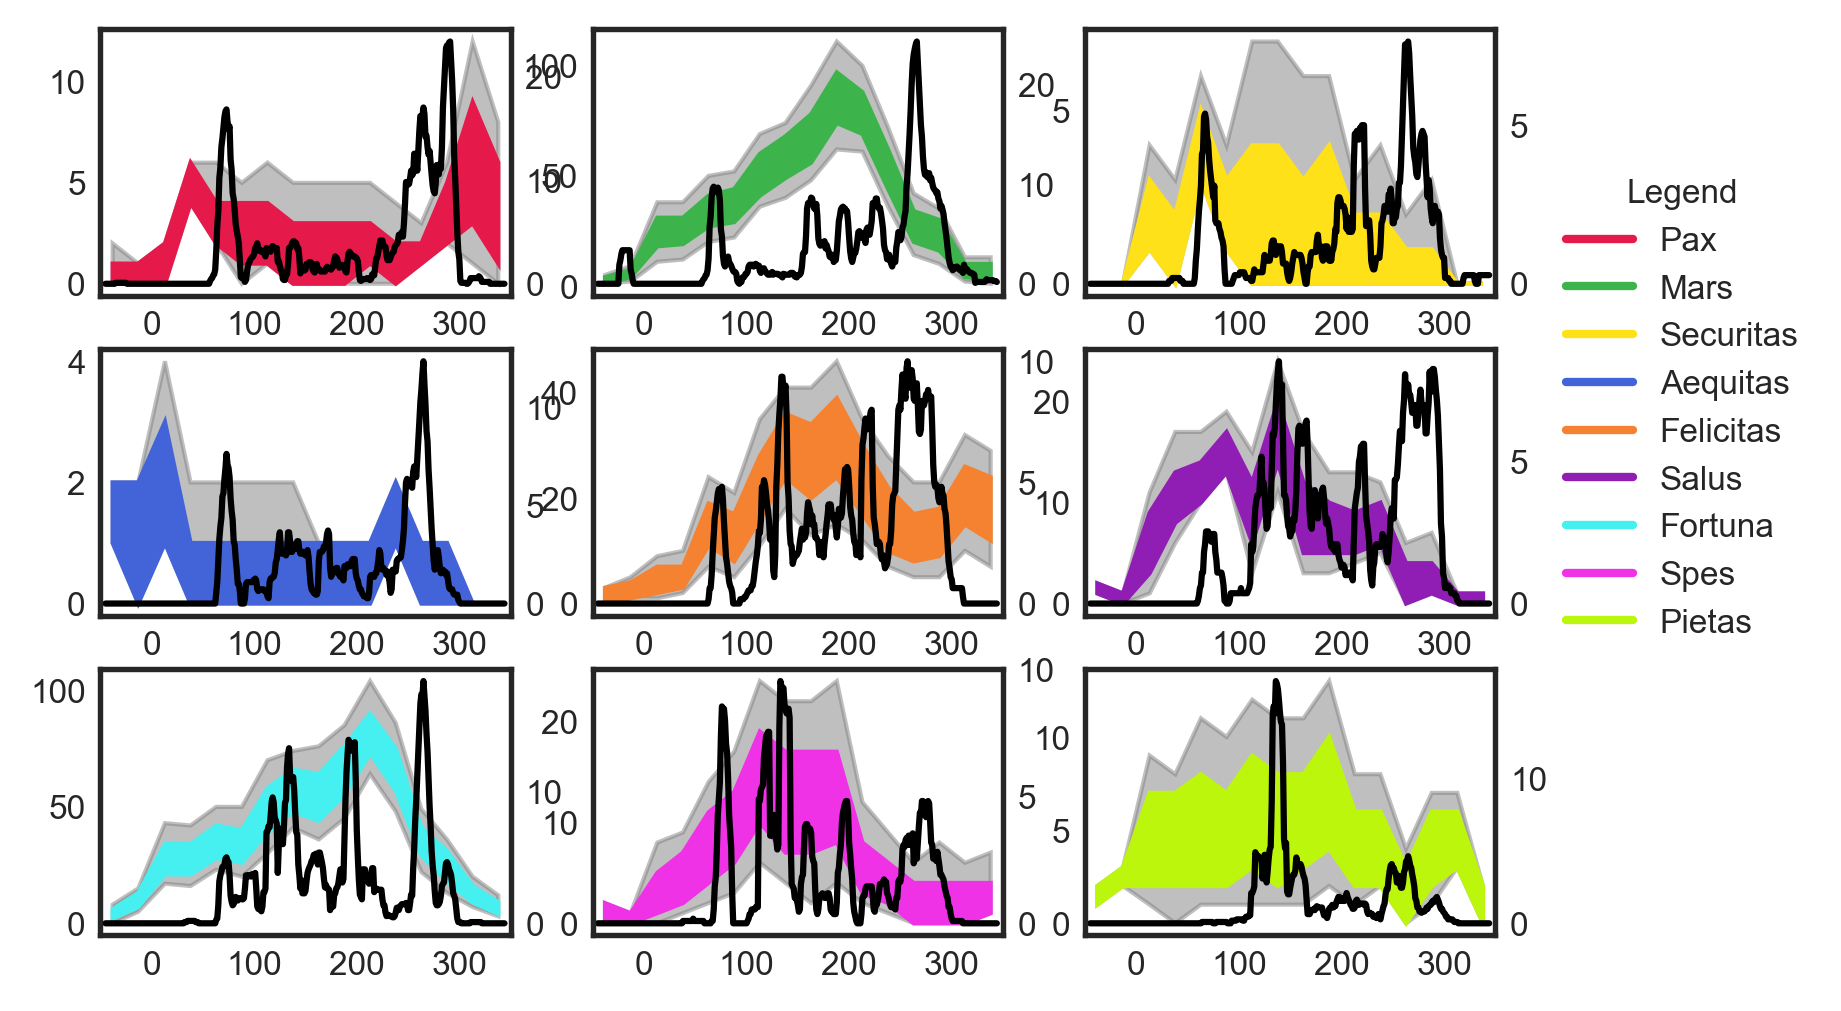

In [141]:
fig, axs = plt.subplots(3,3, tight_layout=True)

for deity, ax in zip(deities_morphs.keys(), axs.ravel()):
    deity_df = LIRE[LIRE["deities"].apply(lambda x: deity in x)]
    tempun.timeblocksplot_from_randoms(deity_df["random_dates"], timeblocks=[-50,350,25], color=colors_dict[deity], ax=ax)
    #tempun.kdeplot_from_randoms(deity_df["random_dates"], color=colors_dict[deity], ax=ax2)
    #sims = tempun.get_simulation_variants(deity_df["random_dates"])
    #for sim in sims[:100]:
    #    sns.kdeplot(sim, ax=ax2, color=colors_dict[deity])
    ax_twinx = ax.twinx()
    ax_twinx.plot(deities_by_date_df[deity].rolling(11, center=True).mean(), color="black")
    ax.set_xlim(-50,350)
#ax2.set_xlim(0,300)

markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors_dict.values()]
ax.legend(markers, colors_dict.keys(), numpoints=1,  title="Legend", bbox_to_anchor=(1.1, 1), loc='lower left')

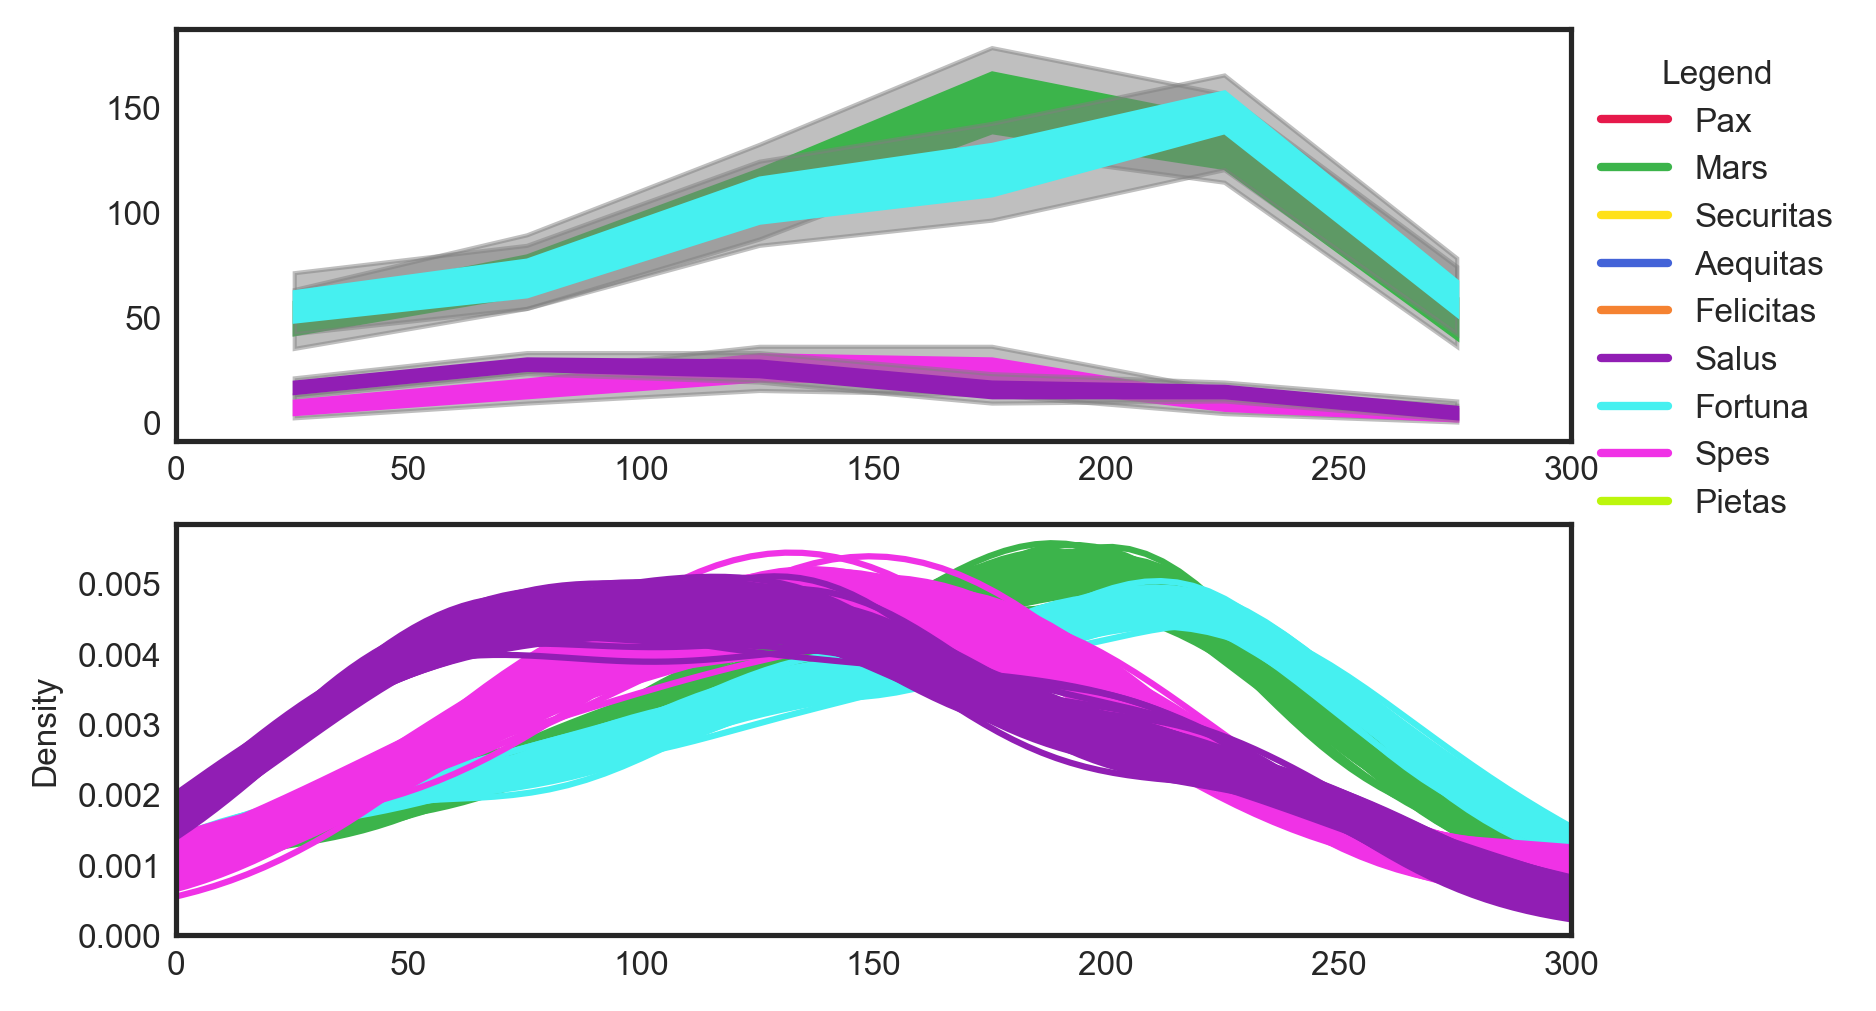

In [142]:
fig, [ax1, ax2] = plt.subplots(2,1)

for deity in ["Mars", "Fortuna", "Spes", "Salus"]:
    deity_df = LIRE[LIRE["deities"].apply(lambda x: deity in x)]
    tempun.timeblocksplot_from_randoms(deity_df["random_dates"], timeblocks=[0,300,50], color=colors_dict[deity], ax=ax1)
    tempun.kdeplot_from_randoms(deity_df["random_dates"], color=colors_dict[deity], ax=ax2, random_size=100)

    #sims = tempun.get_simulation_variants(deity_df["random_dates"])
    #for sim in sims[:100]:
    #    sns.kdeplot(sim, ax=ax2, color=colors_dict[deity])
ax1.set_xlim(0,300)
ax2.set_xlim(0,300)

markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors_dict.values()]
ax1.legend(markers, colors_dict.keys(), numpoints=1,  title="Legend", bbox_to_anchor=(1, 1), loc='upper left')

# Time series analysis
- to correlate two time series data, you have to look at percentual returns, not raw data, otherwise the correlation is typically very high
-
-